#  Student performance analysis

**Out of 18 checks, 15 variables have impacted final_grae or final_score (G3) , 15 recommenations are given in each**

**Features**

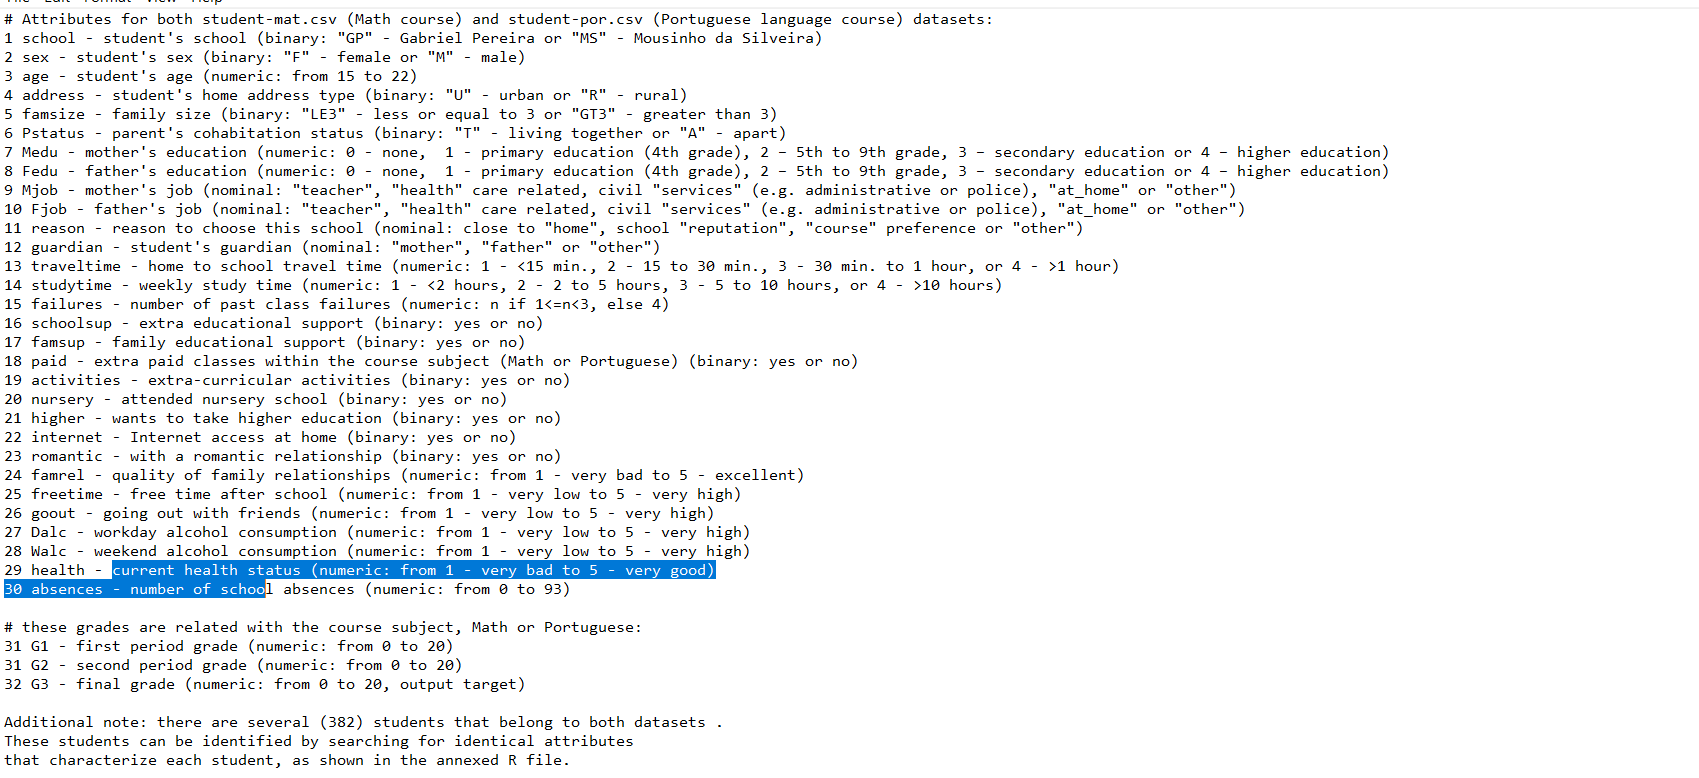


In [425]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None 
import statsmodels.api as sm
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
 
plt.style.use('fivethirtyeight')

In [426]:
math=pd.read_csv(r'C:\Users\HP\Downloads\py\Student Analysis\projects base\3 Student Performance Analysis and Classification\student-mat.csv',sep=';')
math.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [427]:
math.shape

(395, 33)

In [428]:

# add an extra column ['subject] to math DataFrame.
math.insert(1, 'subject', ['math'] * 395)

In [429]:
# Load data for subject "Portuguese".
portuguese=pd.read_csv(r'C:\Users\HP\Downloads\py\Student Analysis\projects base\3 Student Performance Analysis and Classification\student-por.csv',sep=';')
portuguese.head()



school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [430]:
print(portuguese.shape)  # (649, 33)

(649, 33)


In [431]:
# add an extra column ['subject] to portuguese dataframe.
portuguese.insert(1, 'subject', ['por'] * 649)

In [432]:
# Concatenate both DataFrame vertically
students = pd.concat([math, portuguese], ignore_index=True)


# Check and make sure the concatenation is correct
assert math.shape[0] + portuguese.shape[0] == students.shape[0], 'merge error'
assert math.shape[1] == portuguese.shape[1] == students.shape[1], 'merge error'

In [433]:
duplicate_indexes = students.index[students.index.duplicated()]
print("Duplicate Indexes:\n", duplicate_indexes)


Duplicate Indexes:
 Int64Index([], dtype='int64')


# Check the DataFrame



In [434]:
students.shape

(1044, 34)

In [435]:
students.head() # column 'subject' has been inserted. 

school subject sex  age address famsize Pstatus  Medu  Fedu     Mjob  ...  \
0     GP    math   F   18       U     GT3       A     4     4  at_home  ...   
1     GP    math   F   17       U     GT3       T     1     1  at_home  ...   
2     GP    math   F   15       U     LE3       T     1     1  at_home  ...   
3     GP    math   F   15       U     GT3       T     4     2   health  ...   
4     GP    math   F   16       U     GT3       T     3     3    other  ...   

  famrel freetime goout  Dalc  Walc  health absences  G1  G2  G3  
0      4        3     4     1     1       3        6   5   6   6  
1      5        3     3     1     1       3        4   5   5   6  
2      4        3     2     2     3       3       10   7   8  10  
3      3        2     2     1     1       5        2  15  14  15  
4      4        3     2     1     2       5        4   6  10  10  

[5 rows x 34 columns]

In [436]:
students.describe()

age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       0.000000     4.000000     3.000000     2.000000     1.000000   
50%       0.000000     4.000000     3.000000     3.000000     1.000000   
75%       0.000000     5.000000     4.000000     4.000000     2.000000   
max       3.000000     5.000000     5.000000     5.000000     5.000000   

              Walc       health     absences           G1           G2  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      2.284483     3.543103     4.434866    11.213602    11.246169   
std       1.285105     1.424703     6.210017     2.983394     3.285071   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%       1.000000     3.000000     0.000000     9.000000     9.000000   
50%       2.000000     4.000000     2.000000    11.000000    11.000000   
75%       3.000000     5.000000     6.000000    13.000000    13.000000   
max       5.000000     5.000000    75.000000    19.000000    19.000000   

                G3  
count  1044.000000  
mean     11.341954  
std       3.864796  
min       0.000000  
25%      10.000000  
50%      11.000000  
75%      14.000000  
max      20.000000

In [437]:
students.info() # No data missing, but some columns data type are object (text), 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   subject     1044 non-null   object
 2   sex         1044 non-null   object
 3   age         1044 non-null   int64 
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery 

# Sort out the all the column names with data type object 

In [438]:
students.columns

Index(['school', 'subject', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [439]:

text_columns = []
dataTypeDict = dict(students.dtypes)
for col in dataTypeDict: 
    if dataTypeDict[col] == 'O': 
        text_columns.append(col)
text_columns

['school',
 'subject',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [440]:
# convert all the binary categorical features to integers: (Mjob, Fjob, reason, guardian, needs data-encoding method to convert into numerical data)
students['school'] = students['school'].map({'GP':0, "MS":1})
students['subject'] = students['subject'].map({'math':0, "por":1})
students['sex'] = students['sex'].map({'F':0, "M":1})
students['address'] = students['address'].map({'U':0, "R":1})
students['famsize'] = students['famsize'].map({'GT3':0, "LE3":1})
students['Pstatus'] = students['Pstatus'].map({'A':0, "T":1}) #  "T" - living together or "A" - apart
students['schoolsup'] = students['schoolsup'].map({'no':0, "yes":1})
students['famsup'] = students['famsup'].map({'no':0, "yes":1})
students['paid'] = students['paid'].map({'no':0, "yes":1})
students['activities'] = students['activities'].map({'no':0, "yes":1})
students['nursery'] = students['nursery'].map({'no':0, "yes":1})
students['higher'] = students['higher'].map({'no':0, "yes":1})
students['internet'] = students['internet'].map({'no':0, "yes":1})
students['romantic'] = students['romantic'].map({'no':0, "yes":1})
# Recheck the dtypes
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   int64 
 1   subject     1044 non-null   int64 
 2   sex         1044 non-null   int64 
 3   age         1044 non-null   int64 
 4   address     1044 non-null   int64 
 5   famsize     1044 non-null   int64 
 6   Pstatus     1044 non-null   int64 
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   int64 
 17  famsup      1044 non-null   int64 
 18  paid        1044 non-null   int64 
 19  activities  1044 non-null   int64 
 20  nursery 

# Defining final grade column

In [441]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
students['final_grade'] = 'na'
students.loc[(students.G3  >= 15) & (students.G3  <= 20), 'final_grade'] = 'good' 
students.loc[(students.G3 >= 10) & (students.G3  <= 14), 'final_grade'] = 'fair' 
students.loc[(students.G3 >= 0) & (students.G3  <= 9), 'final_grade'] = 'poor' 
students.head(5)



school  subject  sex  age  address  famsize  Pstatus  Medu  Fedu     Mjob  \
0       0        0    0   18        0        0        0     4     4  at_home   
1       0        0    0   17        0        0        1     1     1  at_home   
2       0        0    0   15        0        1        1     1     1  at_home   
3       0        0    0   15        0        0        1     4     2   health   
4       0        0    0   16        0        0        1     3     3    other   

   ... freetime goout Dalc  Walc  health  absences  G1  G2  G3  final_grade  
0  ...        3     4    1     1       3         6   5   6   6         poor  
1  ...        3     3    1     1       3         4   5   5   6         poor  
2  ...        3     2    2     3       3        10   7   8  10         fair  
3  ...        2     2    1     1       5         2  15  14  15         good  
4  ...        3     2    1     2       5         4   6  10  10         fair  

[5 rows x 35 columns]

Text(0, 0.5, 'Number of Student')

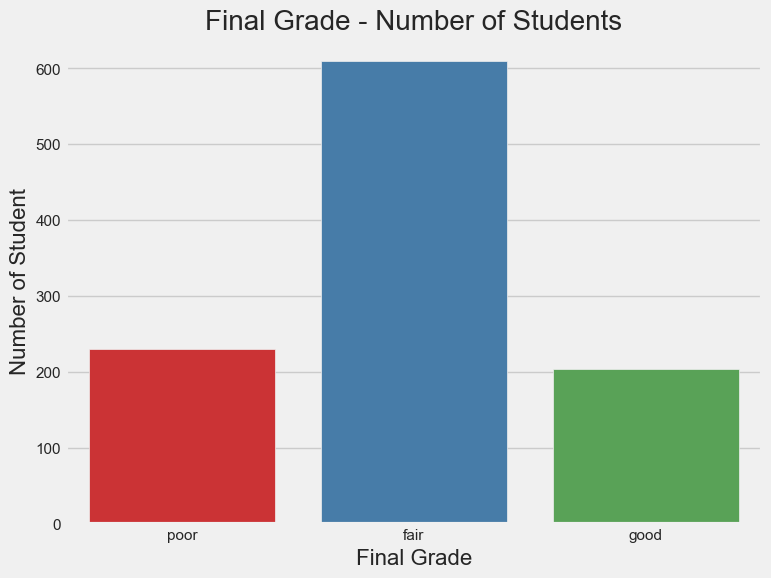

In [442]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(students.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

# Data visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_4888\1052865842.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = students.corr().where(np.tril(np.ones(students.corr().shape)).astype(np.bool))


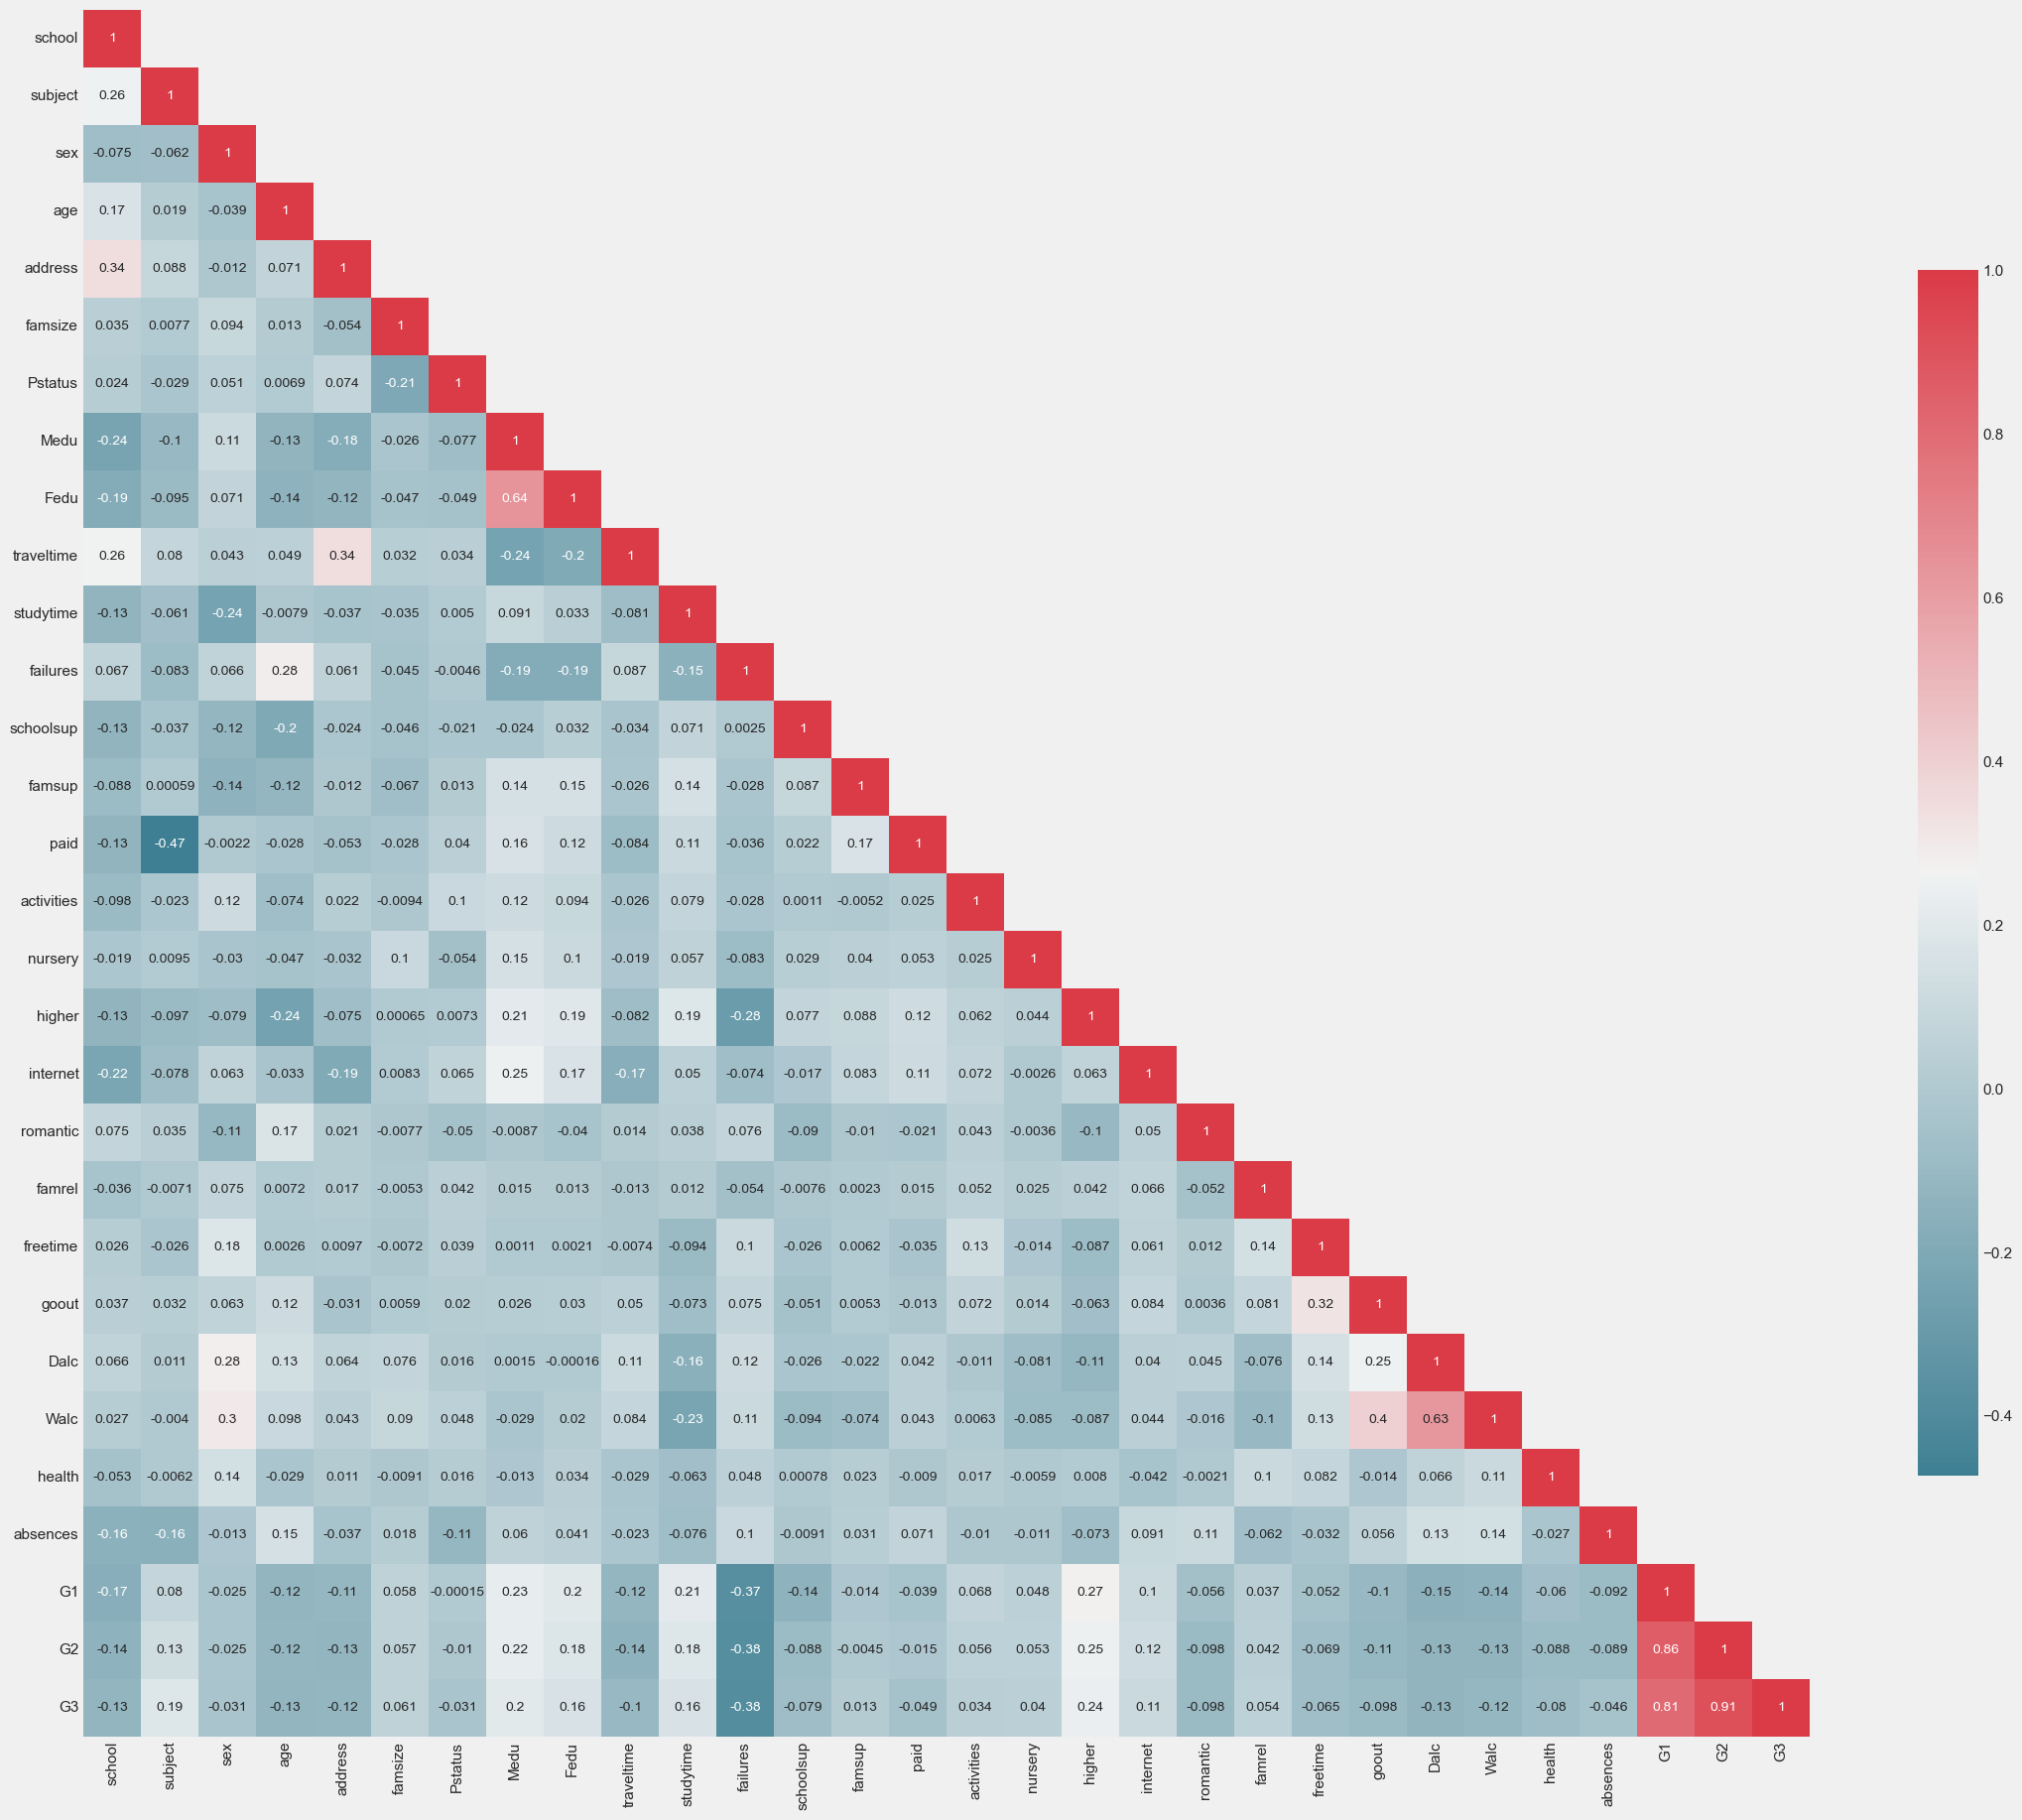

In [135]:
# Plotting the heatmap (missing Mjob, Fjob, reason, guardian)
fig, ax = plt.subplots(figsize=(25, 25))                  

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )  # color map

# Numpy’s tril() function to extract Lower Triangle Matrix
df_lt = students.corr().where(np.tril(np.ones(students.corr().shape)).astype(np.bool))

# plotting the heatmap 
sns.heatmap(data      = df_lt, 
            cmap      = cmap, 
            square    = True, 
            cbar_kws  = {'shrink': .6}, 
            annot     = True, 
            annot_kws = {'fontsize': 10},
            ax        = ax
           )
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

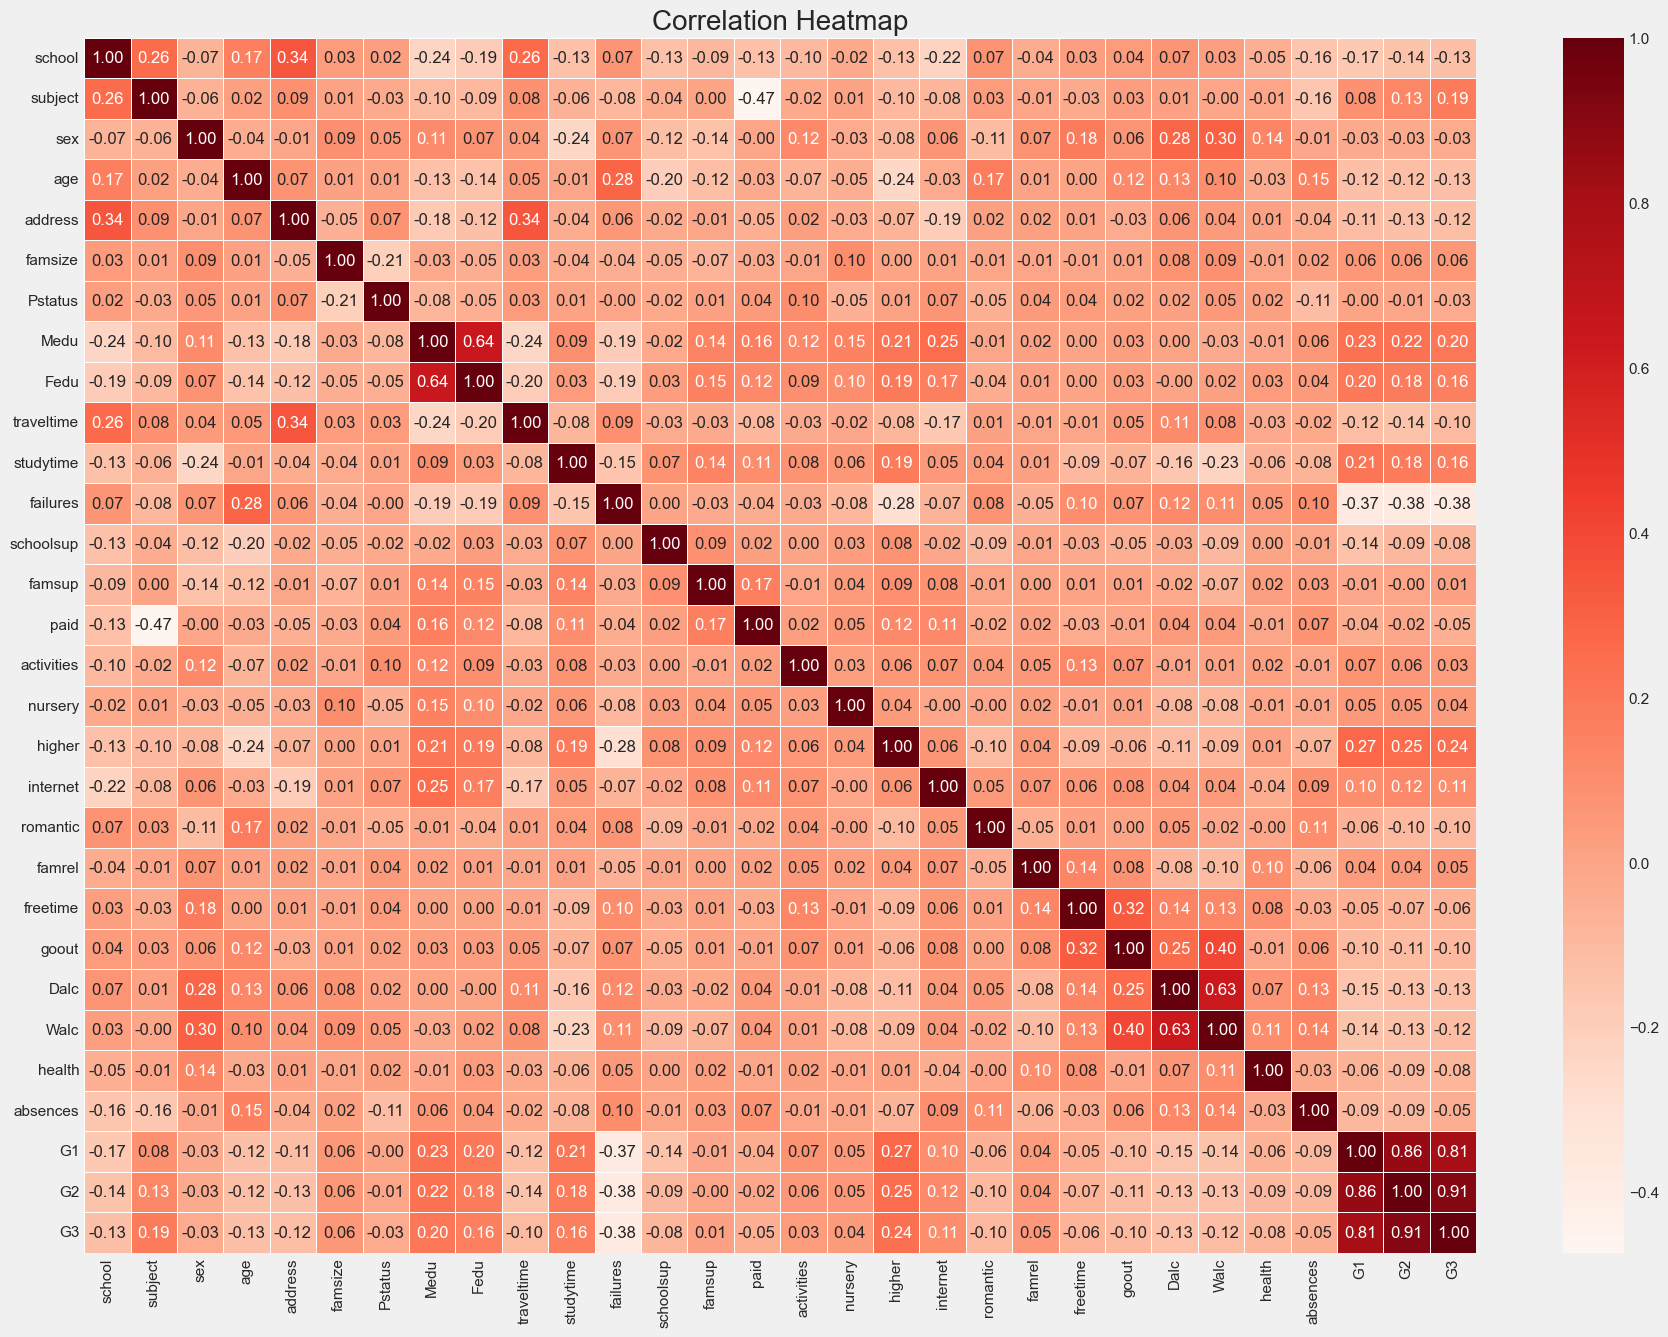

In [136]:
corr = students.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5, linecolor='white', annot_kws={'fontsize': 12})
plt.title('Correlation Heatmap', fontsize=20)

# Interesting findings of Heatmap:

- 1.G1 and G2 and failures are the most 3 related features to final grade G3.
- 2.Mother's education is very much related with father's education.
- 3.Beside the G1 and G2 and failures, we can see the other Top10 influence factors to target G3 are: higher:0.24, Medu:0.2, Fedu:0.16, studytime:0.16, age:-0.13, Dalc:-0.13, address:-0.12, Walc: -0.12, internet:0.11, traveltime: -0.1.
- 4.walc and goout has high relation.
- 5.traveltime and address has high relation.
- 6.paid and subject has high negtive relation.
- 7.Internet has a positive relation to target G3.
- 8.sex, Pstatus, schoolsup, famsup, paid, nursery, romantic, famrel, health, absences (These factors are surpriseingly showing us the grade is not much related to them, which is contrary to our usual perception: family support, school support or extra classes paid should greatly help to improve grades but not as hoped. However, as we usually worried Early school love, poor health and often absences must affect grades but they do not really lead to a decline in grades.

**So let's visualize these findings by plotting them**

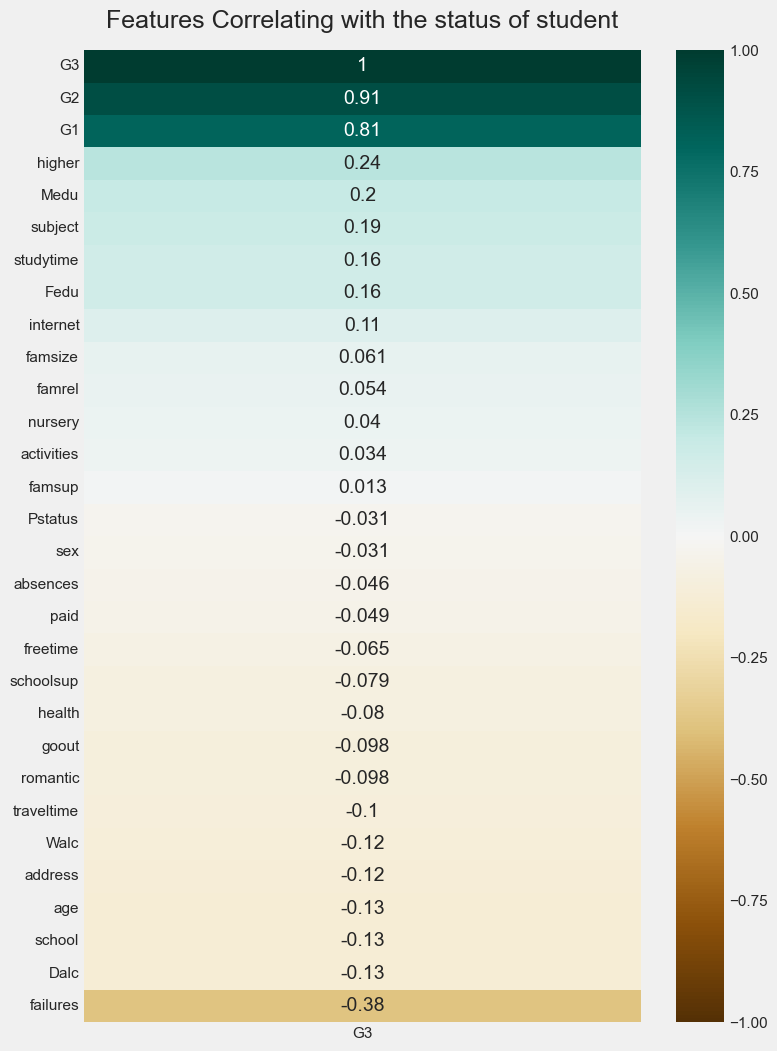

In [137]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(students.corr()[['G3']].sort_values(by='G3', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

**Top10 influence factors to target G3 are: higher:0.24, Medu:0.2, Fedu:0.16, studytime:0.16, age:-0.13, Dalc:-0.13, address:-0.12, Walc: -0.12, internet:0.11, traveltime: -0.1.**

**Based on this heatmap we can do a quck check about most impactfull features on student status:**

- **thee most impactfull (positively) features:**

- mother and father with height education had a positif impact on student performance

- the students who wants to take higher education are having also good grades sow it could be better to tell student how great and fun to take higher education

- studytime also positively impacts overall Grade (G3)

- **the most impactfull (negatively) features:**

- going out with friends to much hours can impact badely

- age, travel_time, and failures are other features that also impact negatively the student performances.

In next steps we will confirm this conclusions by using distribution plot,density graphs.....

**countplot to review G3 distritution**

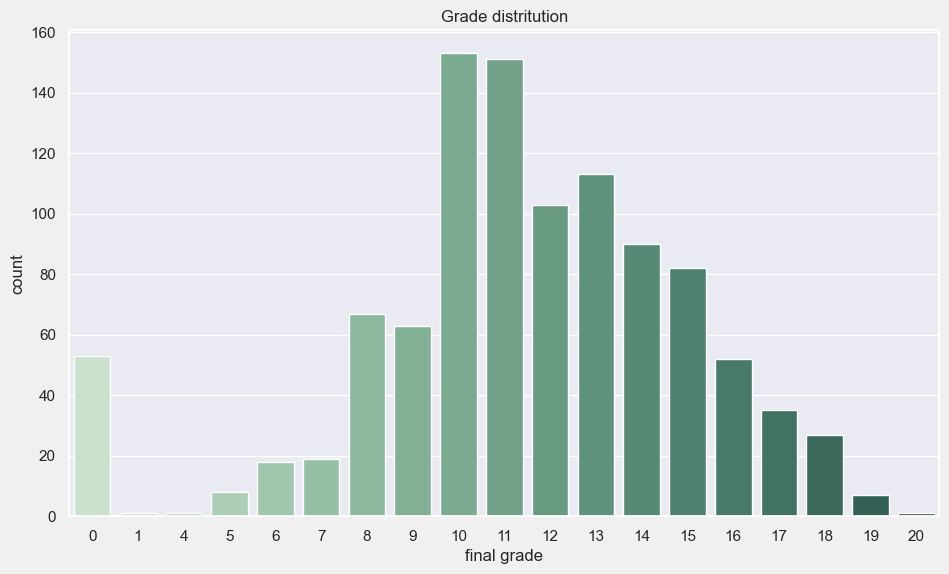

In [138]:


plt.figure(figsize=(10, 6))
sns.set()
sns.countplot('G3', data=students, palette=("ch:2.5,-.2,dark=.3"))
plt.title('Grade distritution')
plt.xlabel('final grade')
plt.show()

**Above plot shows that the grades of the students conform to the normal distribution. However there are a bit too much the students whose grade is only 0. It might be because of cheating when doing exam. We think the students whose grade is 0 should be removed.**

# Grade Classification

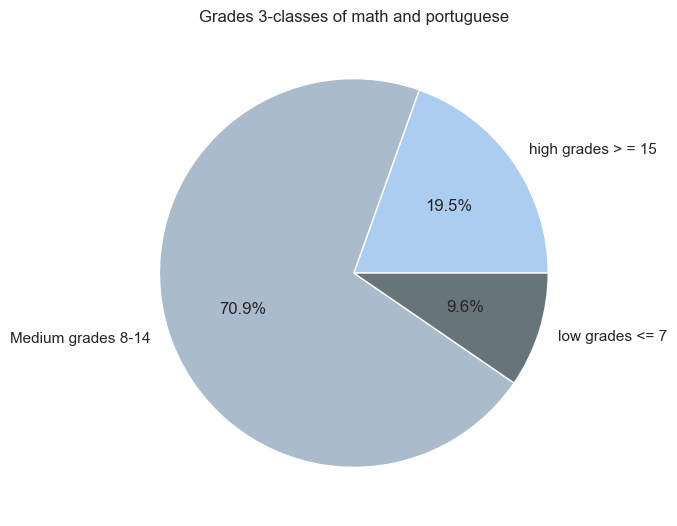

In [139]:
# let's class our grades (high:>=15, mid:8-14, low:<=7)
high = students.loc[students['G3'] >= 15].count()[0]
medium = students.loc[(students['G3'] >= 8) & (students['G3'] <=14)].count()[0]
low = students.loc[students['G3'] <= 7].count()[0]

# pieplot
plt.figure(figsize=(10, 6))
labels = ['high grades > = 15', 'Medium grades 8-14', 'low grades <= 7']
colors = ['#abcdef', '#aabbcc', '#67757a']
plt.pie([high,medium,low], labels=labels, colors=colors, autopct='%1.1f%%', shadow=False)
plt.title('Grades 3-classes of math and portuguese')
plt.show()

# barplot for Medu and Fedu (Mother and Father Education)

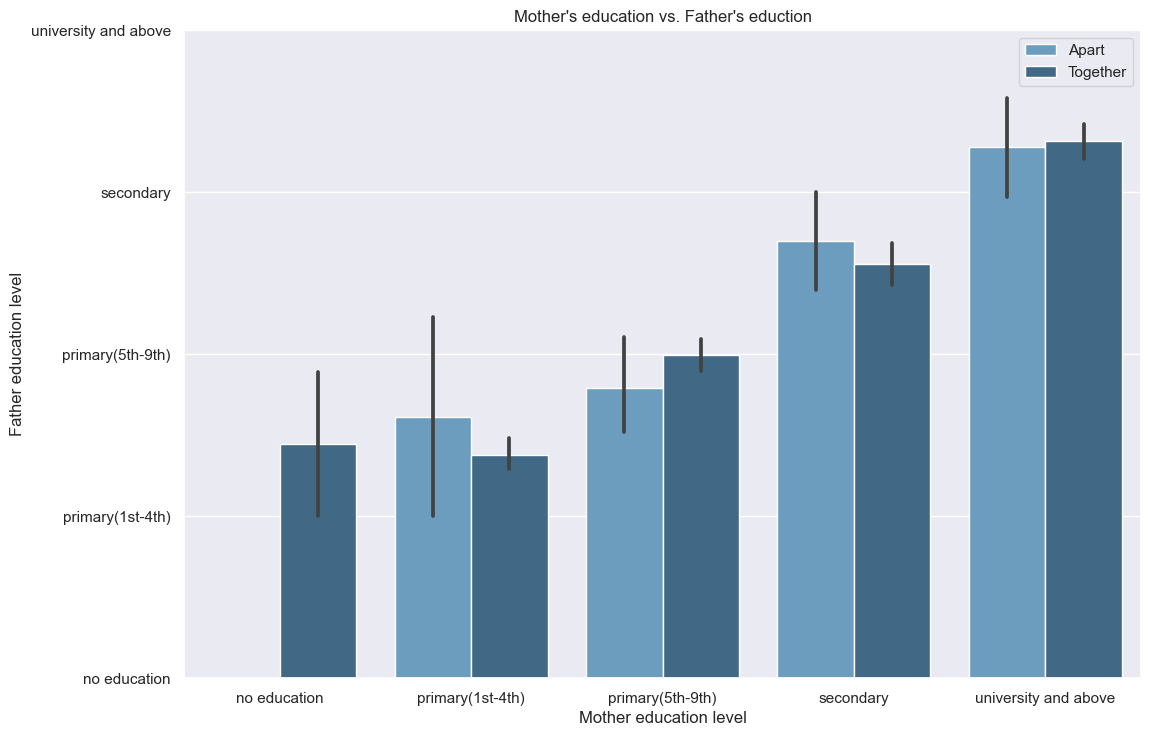

In [140]:
new_Pstatus = []
for each_status in students['Pstatus']: 
    if each_status == 0: 
        new_Pstatus.append('Apart')
    else: 
        new_Pstatus.append('Together')
students['NPstatus'] = new_Pstatus
        
plt.figure(figsize=(11, 8))
sns.set()
labels=['Apart', 'Together']
sns.barplot('Medu', 'Fedu', hue='NPstatus', data=students, palette=("Blues_d"))

plt.title("Mother's education vs. Father's eduction")
plt.xlabel('Mother education level')
plt.ylabel('Father education level')
plt.xticks(np.arange(5), ('no education', 'primary(1st-4th)', 'primary(5th-9th)', 'secondary', 'university and above'))
plt.yticks(np.arange(5), ('no education', 'primary(1st-4th)', 'primary(5th-9th)', 'secondary', 'university and above'))
plt.legend()
plt.show()

**This plot shows that people prefer to marry similar education background person, it might because they have more interests in common. And the devoice rate is almost 50% high in each group. The no education group has very small sample, not representative.**



# EDA

# Study time and Grade, Genderwise

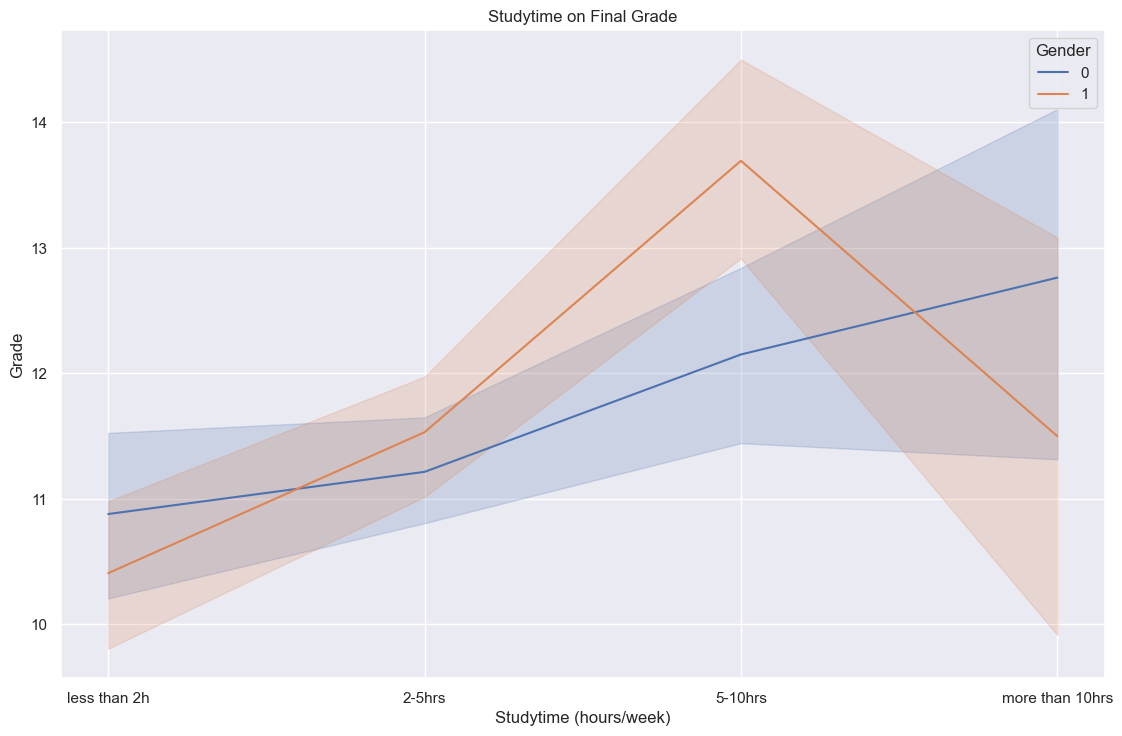

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'studytime'
sorted_by_studytime_df = students.sort_values('studytime')

# Create the line plot
plt.figure(figsize=(12, 8))
sns.set()
sns.lineplot(x='studytime', y='G3', hue='sex', data=sorted_by_studytime_df)

# Set labels and title
plt.xlabel('Studytime (hours/week)')
plt.ylabel('Grade')
plt.xticks([1, 2, 3, 4], ['less than 2h', '2-5hrs', '5-10hrs', 'more than 10hrs'])
plt.legend(title='Gender')  # Add a title to the legend
plt.title('Studytime on Final Grade')
plt.show()


**0 is female and 1 is male : From above plot, it shows that for female students, the more studytime spent, the better the grade is. However for male students, the grade is increasing with the studytime, but when the total weekly studytime is over than 10hs, their grades are declining.**



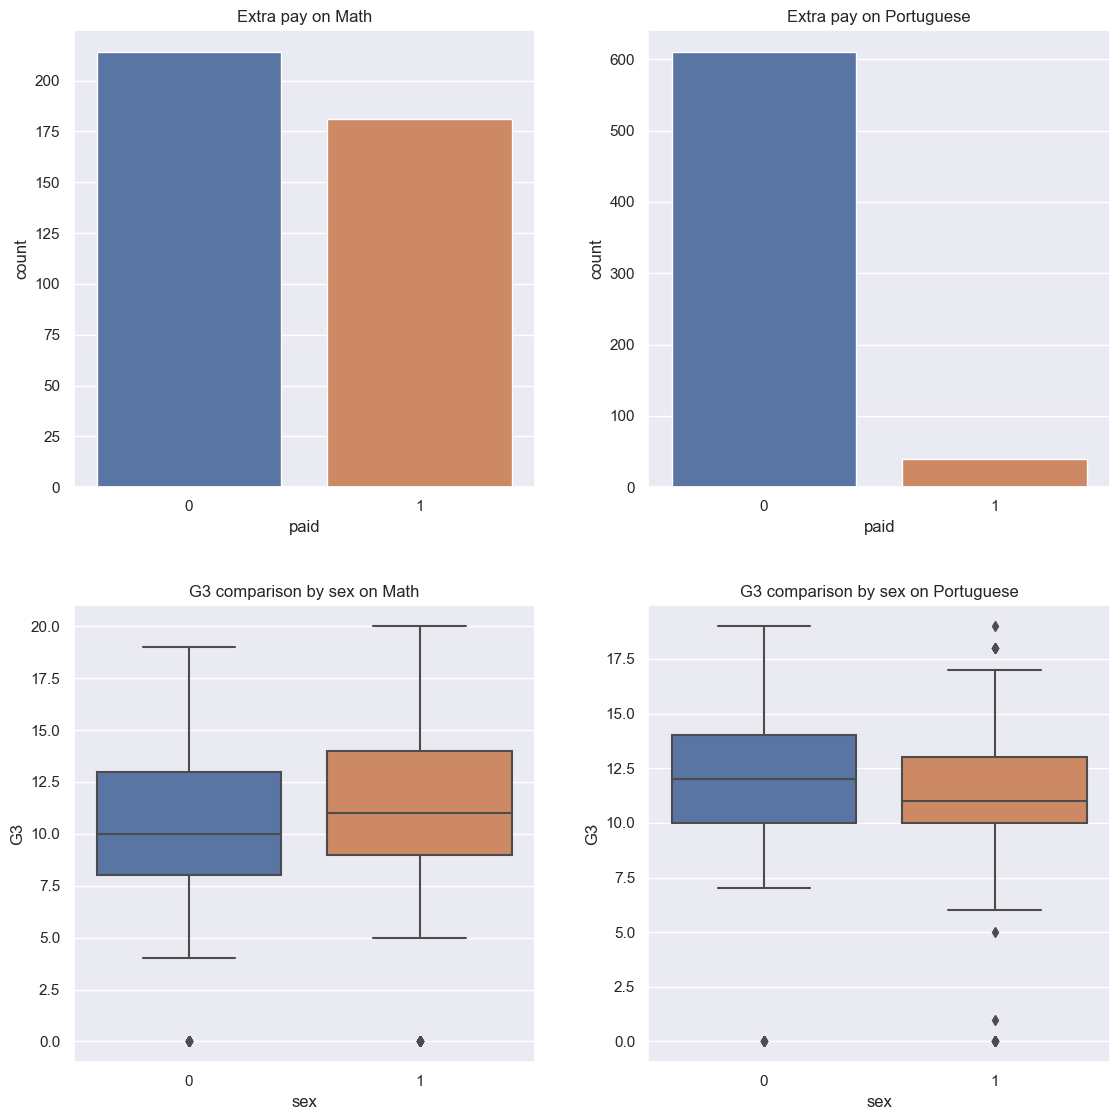

In [156]:


fig, ax = plt.subplots(2,2,figsize=(12, 12))
sns.set()

# First row of subplots 
# Compare the percentage of extra pay on Math and Portuguese
sns.countplot('paid', data=students.loc[students['subject']==0], ax=ax[0][0])
ax[0][0].set_title('Extra pay on Math') 
sns.countplot('paid', data=students.loc[students['subject']==1], ax=ax[0][1])
ax[0][1].set_title('Extra pay on Portuguese')


# Second row of subplots
# Compare Female and Male students performance on each subject
sns.boxplot('sex', 'G3', data=students.loc[students['subject']==0], ax=ax[1][0])
ax[1][0].set_title('G3 comparison by sex on Math') 
sns.boxplot('sex', 'G3', data=students.loc[students['subject']==1], ax=ax[1][1])
ax[1][1].set_title('G3 comparison by sex on Portuguese') 



fig.tight_layout(pad=3.0)

plt.show()

**Above plotttings show:**

- 1 - For extra classes, parents paid more on Math and very little paid on Portuguese.
- 2 - Male students have higher performance on Math and Female students have higher performance on Portuguese.

# Genderwise comparison on final_score : G3

<AxesSubplot:xlabel='sex', ylabel='G3'>

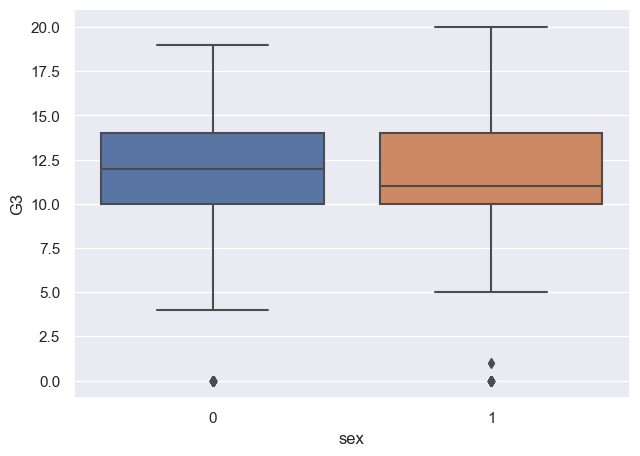

In [157]:
sns.boxplot(x='sex',y='G3',data=students)

**Female students have better performance in school than the male students. Since the mean score of girls is more than boys**

# Age wise Grade

In [173]:
def age(age):
    new_age=[]
    for i in age:
        if(i < 17):
            i=0
        elif (i < 19):
            i=1
        else:
            i=2
        new_age.append(i)
    return new_age




In [174]:
students['age']=age(students['age'])


<AxesSubplot:xlabel='age', ylabel='G3'>

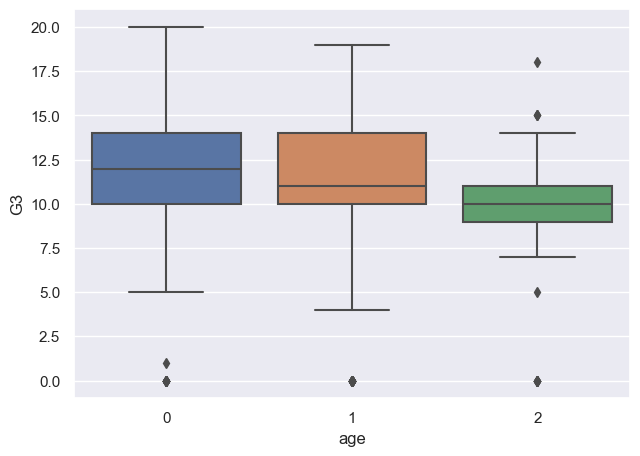

In [175]:
sns.boxplot(x='age',y='G3',data=students)



<AxesSubplot:xlabel='age', ylabel='G3'>

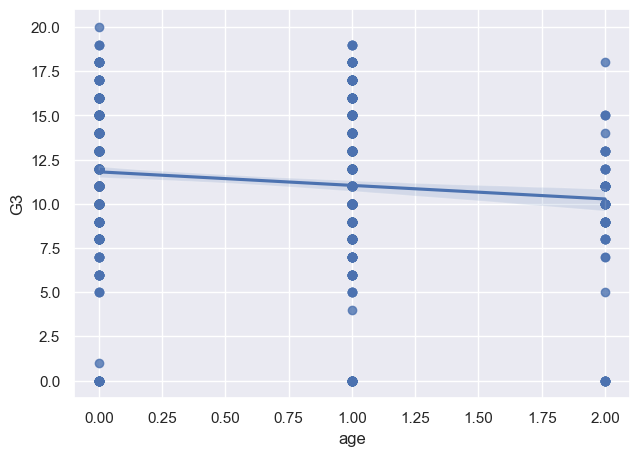

In [176]:
sns.regplot(x='age', y='G3', data=students )



**Students of age (19-20) mostly have a score around 10.0 but age as increases grade deteriorated**

1 - The grade is decline with the age increasing. This is according with our normal recgonition. The highter the grade, the knowledge is more difficult.

# Family size

**{'GT3':0, "LE3":1}**

**"LE3" - less or equal to 3 or "GT3" - greater than 3**


<AxesSubplot:xlabel='famsize', ylabel='G3'>

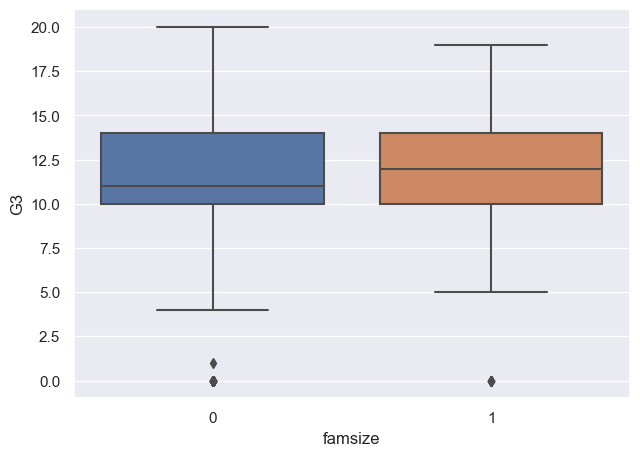

In [179]:

sns.boxplot('famsize','G3',data=students)



**Students with LE3 (1) family size have good score (mean is better than GT3 (0)**

# Parent Status

**{'A':0, "T":1})**

- **"T" - living together or "A" - apart**

In [180]:
students['Pstatus'].value_counts()


1    923
0    121
Name: Pstatus, dtype: int64

<AxesSubplot:xlabel='Pstatus', ylabel='G3'>

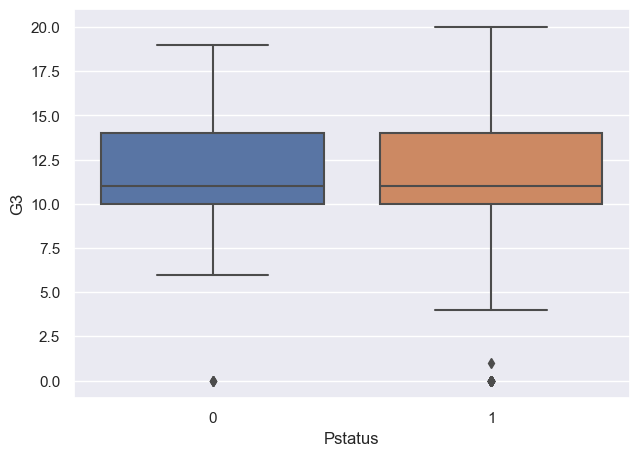

In [181]:
sns.boxplot(x='Pstatus',y='G3',data=students)


**Parent's status of living together or apart do not affect  the scores .**

# 1:  Frequency of hanging out with friends and Alcohol Consumption and Grade

**going out with friends (numeric: from 1 - very low to 5 - very high)**

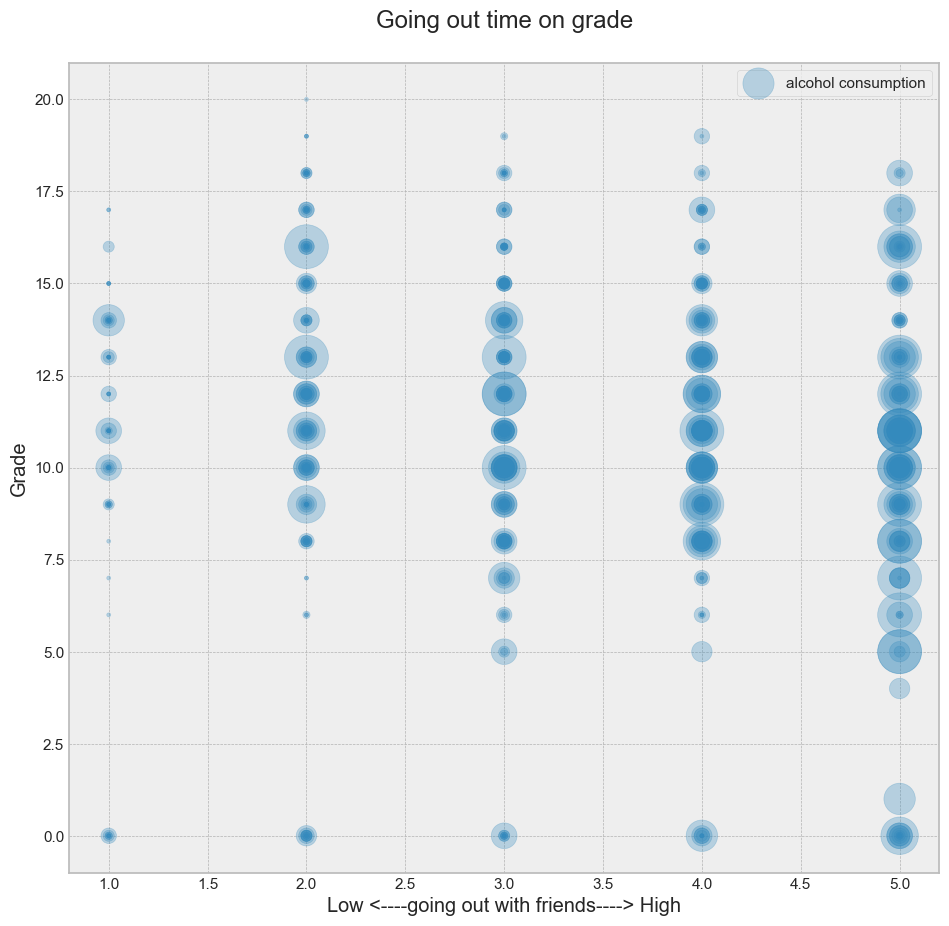

In [143]:
# Scatter plot 
plt.style.use("bmh")
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
s = (students['Walc'] + students['Dalc']) ** 3
axes.scatter(students['goout'], students['G3'], alpha=0.3, s=s, label='alcohol consumption')

axes.set_xlabel('Low <----going out with friends----> High')
axes.set_ylabel('Grade')
axes.set_title('Going out time on grade\n')
axes.legend()
plt.show()

**From this plot we can see that the students who go out rarely has the minimal fluctuations in grades but not the best grade group. The best group is going out on low level but still spend sometime with friends.**

**And all the groups the top grade students almost no alcohol consumption or at a lower level. With the frequency of going out increasing, the alcohol assumption is increasing too.**

Text(0.5, 0, 'Frequency of Going Out')

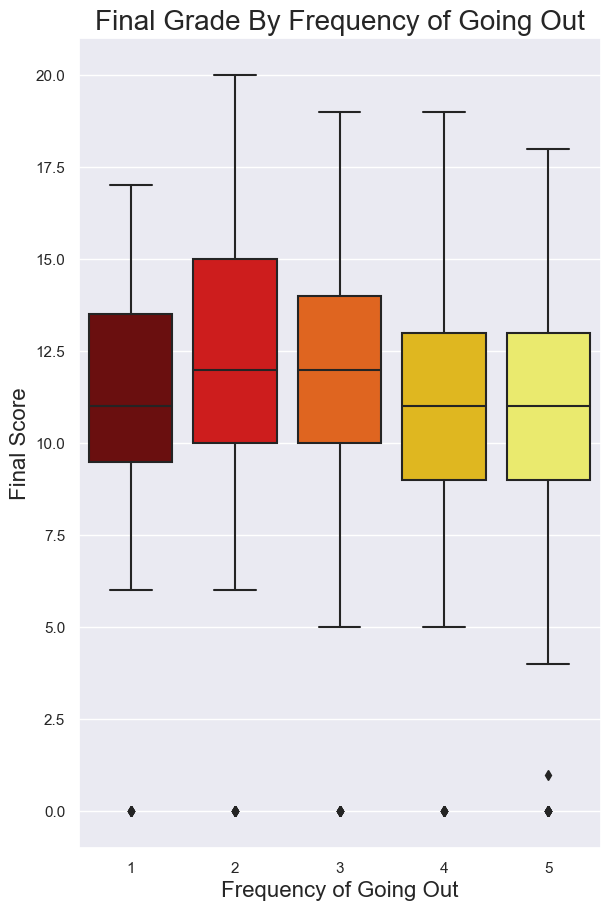

In [74]:

plt.figure(figsize=(6,10))
sns.boxplot(x='goout', y='G3', data=students, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

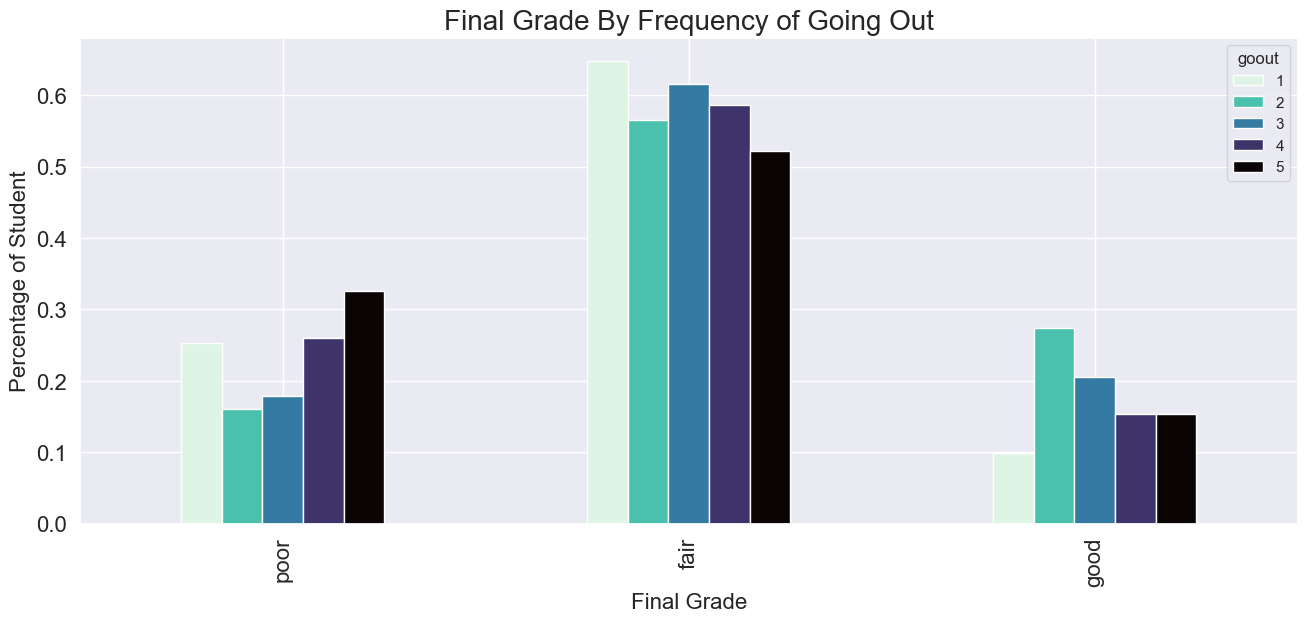

In [76]:
out_tab = pd.crosstab(index=students.final_grade, columns=students.goout)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

**Students who go out more frequently has negative impact on good grade**

**Hypothesis Testing**

**The null hypothesis (H0) is typically that there's no association between the variables, while the alternative hypothesis (H1) is that there's a significant association.**

In [71]:
out_tab = pd.crosstab(index=students.final_grade, columns=students.goout)
out_perc = out_tab.apply(perc).reindex(index)

In [72]:
# chi-square test result -- significant!
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

4.365198328282194e-05

**Hyphothesis Testing confirmed, the frequency of going out with friends has a significant correlation with students' final performance.**

**Recommendation**
Encourage students to limit their frequency of going out to prioritize studying and achieve better grades.
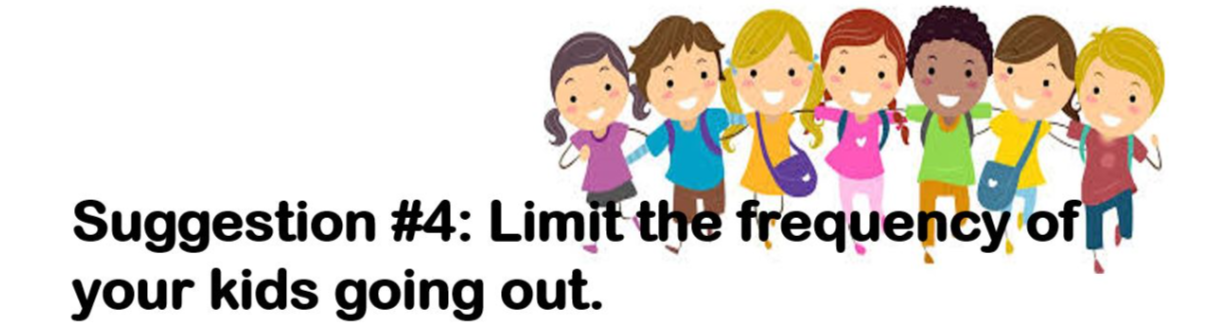

# 2 Travel Time and Grade

**home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


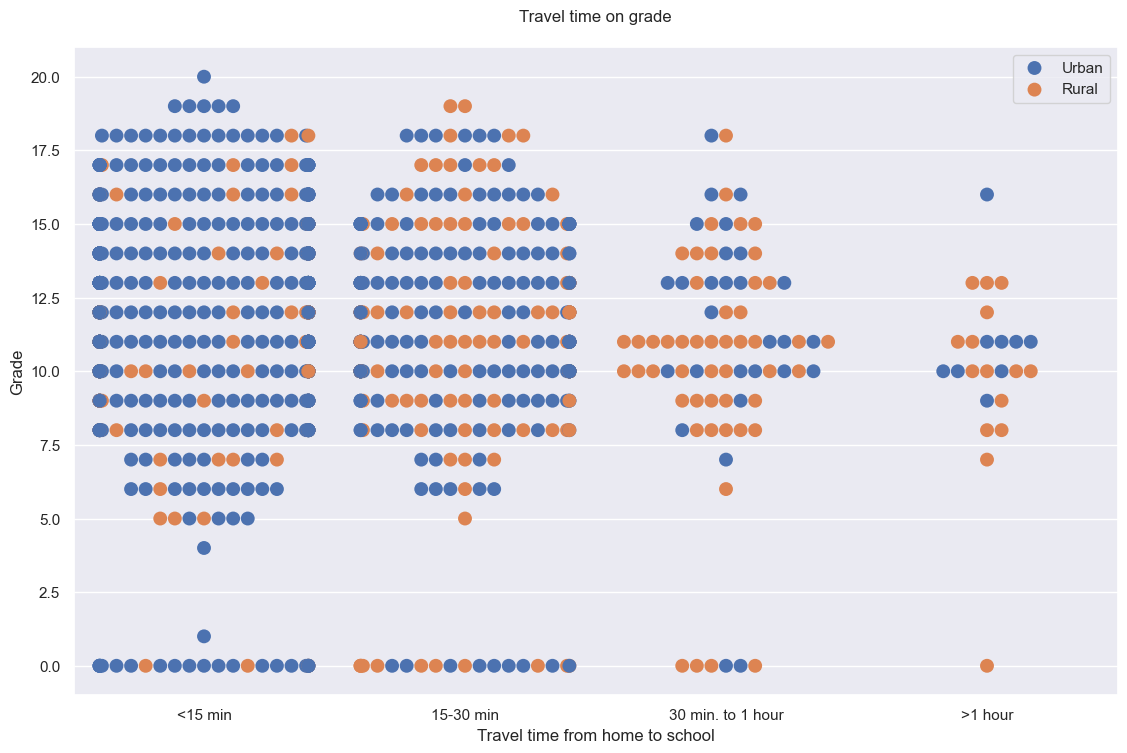

In [145]:
# swarmplot plot 
sns.set()
plt.figure(figsize=(12, 8))
sns.swarmplot('traveltime', 'G3', data=students, hue='address', size=10)

plt.xlabel('Travel time from home to school')
plt.ylabel('Grade')
plt.xticks([0,1,2,3], ('<15 min', '15-30 min', '30 min. to 1 hour', '>1 hour'))

plt.title('Travel time on grade\n')
plt.legend(labels=['Urban', 'Rural'])
plt.show()

**From this plot we can see that the students who spent more time on the way to school have lower grades. And most of the students live near school and students who live in Rural are normally have more travel time than students live in Urban.**




**Insight:**
    
- From this plot we can see that the students who spent more time on the way to school have lower grades. And most of the students live near school and students who live in Rural are normally have more travel time than students live in Urban.

**Recommendation:**
    
- Provide support for students with long commutes, such as extra resources or flexible scheduling. Consider relocating or providing transportation assistance for rural students

<AxesSubplot:xlabel='traveltime', ylabel='G3'>

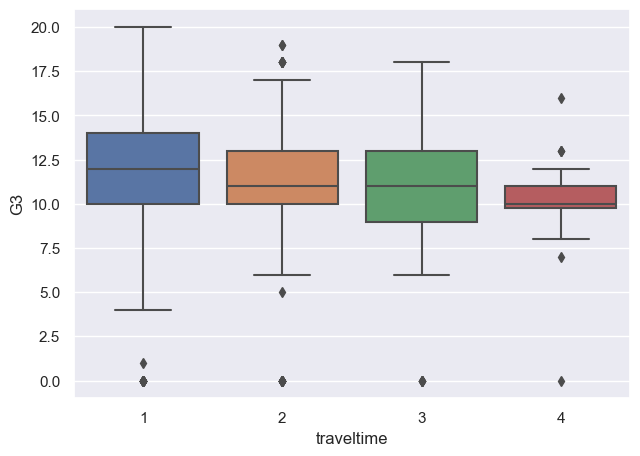

In [146]:
sns.boxplot(x='traveltime',y='G3',data=students)

**Students who have less travel time to reach school tends to perform better**

# 3 Final Grade By Desire To Go To College

**higher:  wants to take higher education (binary: yes (1) or no (0))**

<AxesSubplot:xlabel='higher', ylabel='G3'>

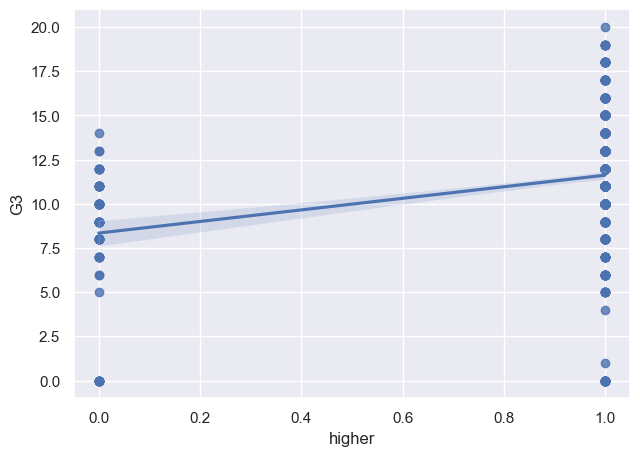

In [159]:
sns.regplot(x='higher', y='G3', data=students)

**Students who want to take higher education get the better study performance.**

Text(0.5, 0, 'Age')

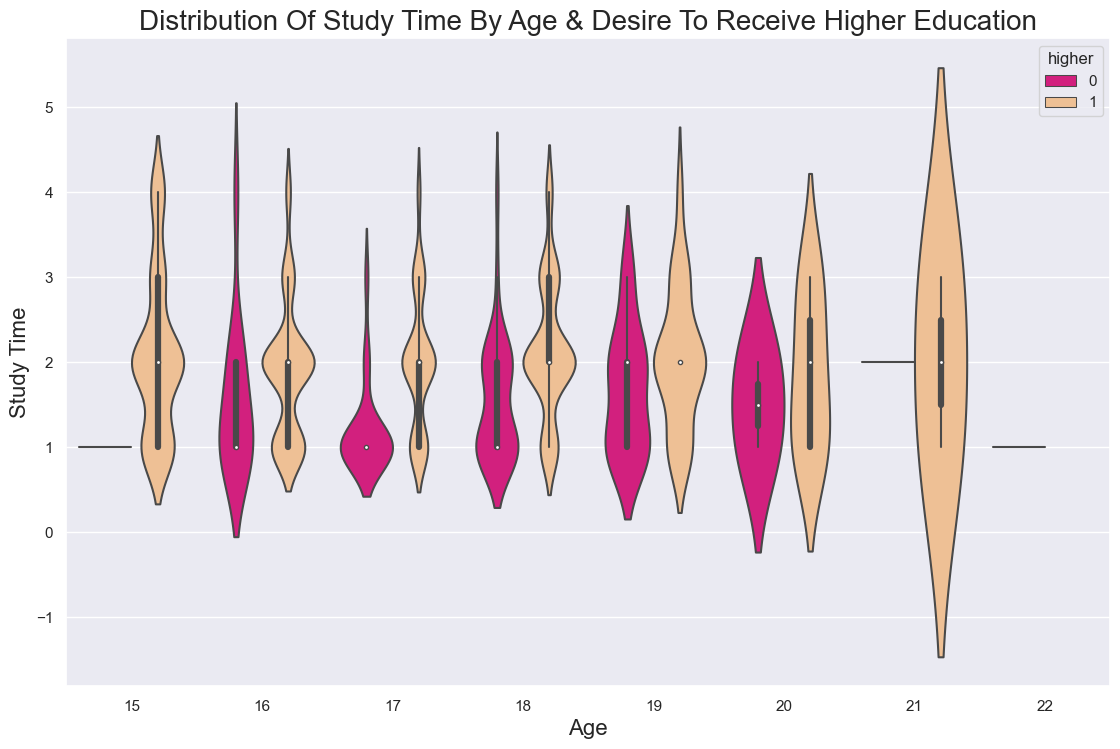

In [82]:
# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='studytime', hue='higher', data=students, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

**Those who have desire for higher education study more**

In [85]:
higher_tab = pd.crosstab(index=students.final_grade, columns=students.higher)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

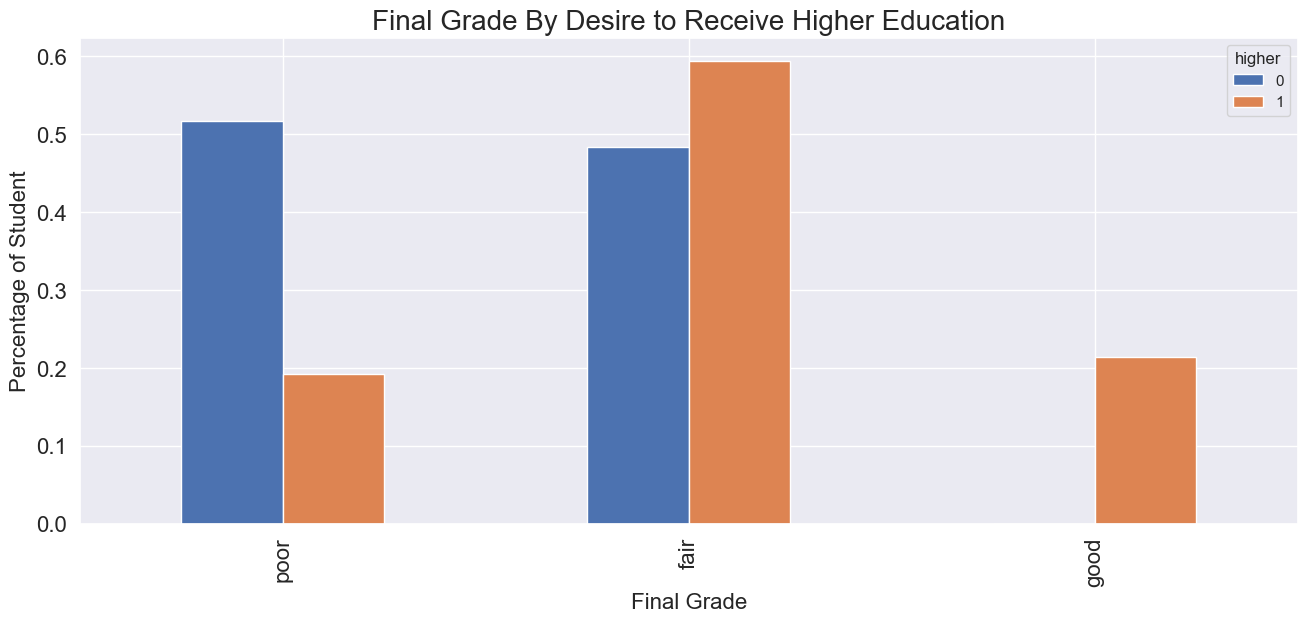

In [87]:
higher_perc.plot.bar( figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

<AxesSubplot:xlabel='higher', ylabel='G3'>

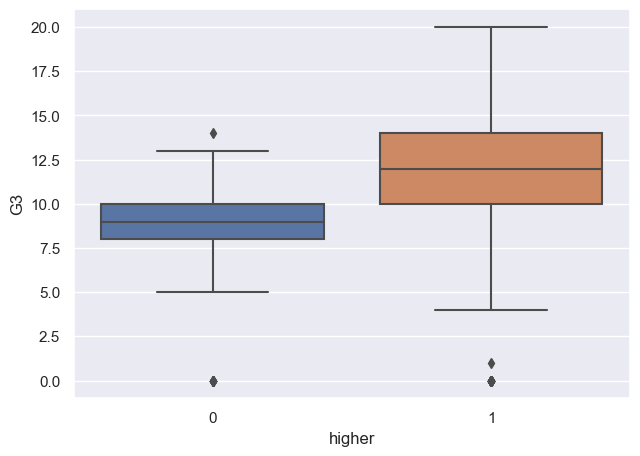

In [200]:
sns.boxplot('higher','G3',data=students)

**Only those who desires for higher education has good grade**

**Hypothesis Testing**

In [88]:
# chi-square test result -- significant!
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

2.2470914018413168e-13

**Hyphothesis Testing confirmed, the desire of going to college has a significant correlation with students' final performance.**

**Insight**
- the desire of going to college has a significant correlation with students' final performance.

 
**Recommendation**
- Encourage students to set clear college goals and aspirations, as having a strong desire to attend college can positively impact their motivation and ultimately, their final academic performance.


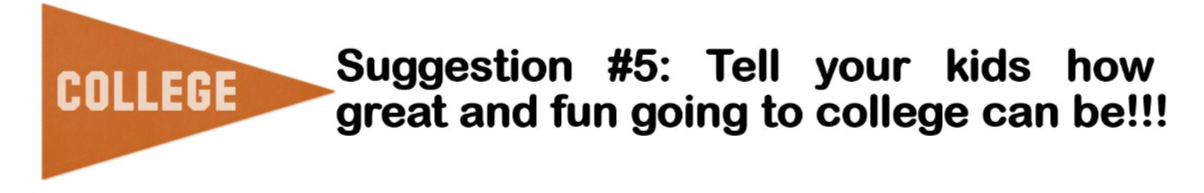

# 4 School wise Grade comparison

In [89]:
students['school'].unique()

array([0, 1], dtype=int64)

**'GP':0, "MS":1**

<AxesSubplot:xlabel='school', ylabel='G3'>

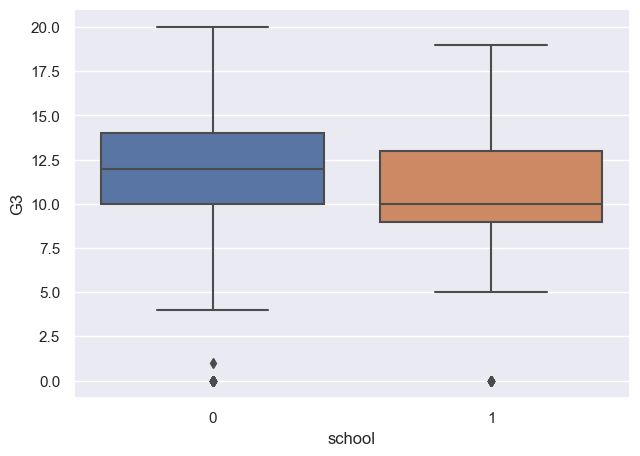

In [90]:
sns.boxplot(x='school',y='G3',data=students)      # 0 = GP and 1 = MS

**Hypothesis Testing**

In [171]:
 
alc_tab1 = pd.crosstab(index=students.final_grade, columns=students.school)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)
# chi-square test result -- significant!


In [172]:

alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

2.1387388675631058e-05


**Insight:**
    
- **Students at GP (General Program) perform better than students at MS (Magnet School).**

**Recommendation:**
    
- **Investigate the factors contributing to the better performance of GP students, such as teaching methods, curriculum, or student support services, and consider implementing these best practices at MS to improve student outcomes.**

# 5 Final Grade By Living Area

In [98]:
students['address'].value_counts()

0    759
1    285
Name: address, dtype: int64

**'U':0, "R":1**

<AxesSubplot:xlabel='address', ylabel='G3'>

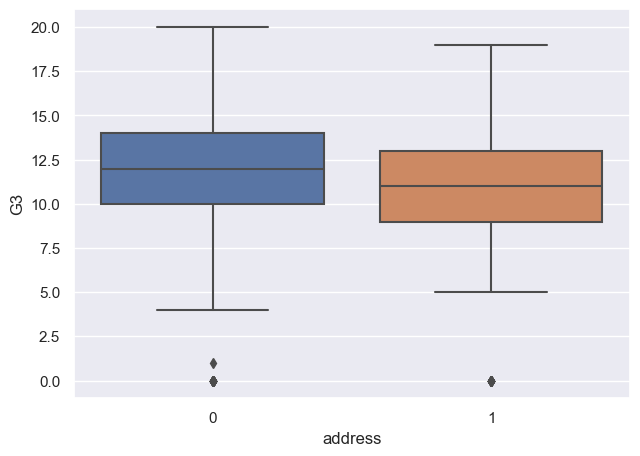

In [99]:
sns.boxplot('address','G3',data=students)

**Urban students are distriuted widely in terms of scores (4 to 20) , whereas rural students are clustered between 5 and 18**
**Performance of Urban students is better than Rule students**

In [91]:
ad_tab1 = pd.crosstab(index=students.final_grade, columns=students.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

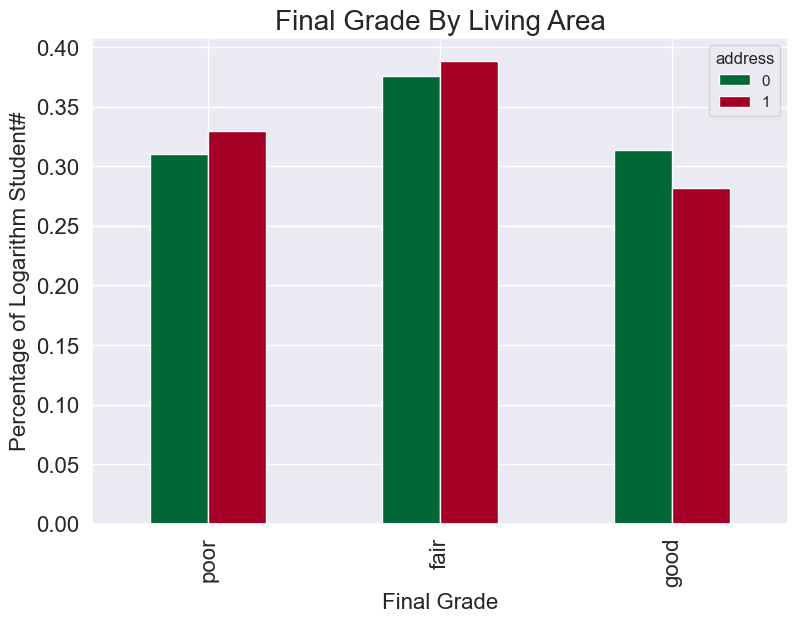

In [92]:
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

**Students living in Urban Area(0) has good grades compared to the one living in rural area**

**Hypothesis Testing**

In [94]:
# chi-square test result -- significant!
ad_table = sm.stats.Table(ad_tab1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

0.007608910517873602

**We reject the null hypothesis which says there is no relationship between variables being studied**

**Recommendation**
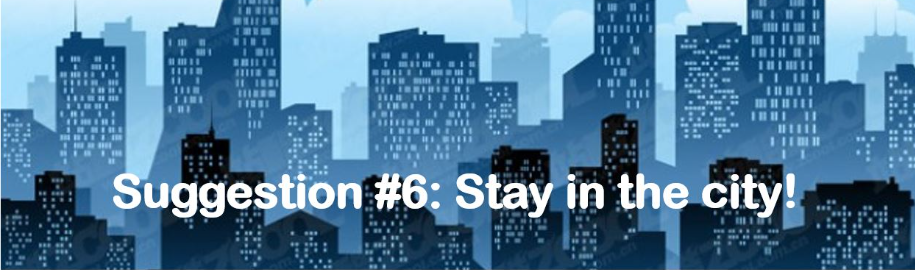

**Insight:**
- Students living in Urban Area (0) have good grades compared to those living in Rural Area (1).

**Recommendation:**
    
- Identify the factors contributing to the urban-rural grade disparity, such as access to resources, quality of schools, or socio-economic conditions, and develop targeted interventions to support rural students in improving their academic performance.

# 6 Mother's and Father's Education Level and Grade G3

**0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education**

In [201]:
good['good_student_father_education'] = good.Fedu
poor['poor_student_father_education'] = poor.Fedu
good['good_student_mother_education'] = good.Medu
poor['poor_student_mother_education'] = poor.Medu



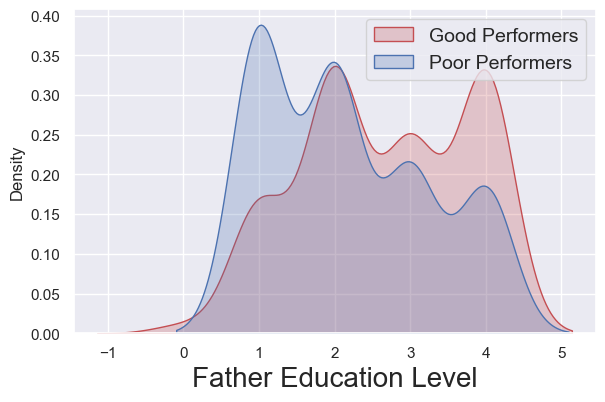

In [202]:
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r", label='Good Performers')
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b", label='Poor Performers')
plt.xlabel('Father Education Level', fontsize=20)
plt.legend(loc='upper right', fontsize=14)



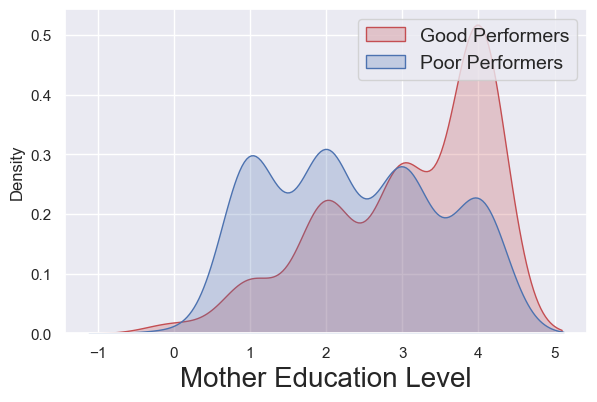

In [203]:

plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r", label='Good Performers')
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b", label='Poor Performers')
plt.xlabel('Mother Education Level', fontsize=20)
plt.legend(loc='upper right', fontsize=14)

- **parents' education level has a positive correlation with students' final score. Comparatively, mother's education level has bigger influence than father's education level**

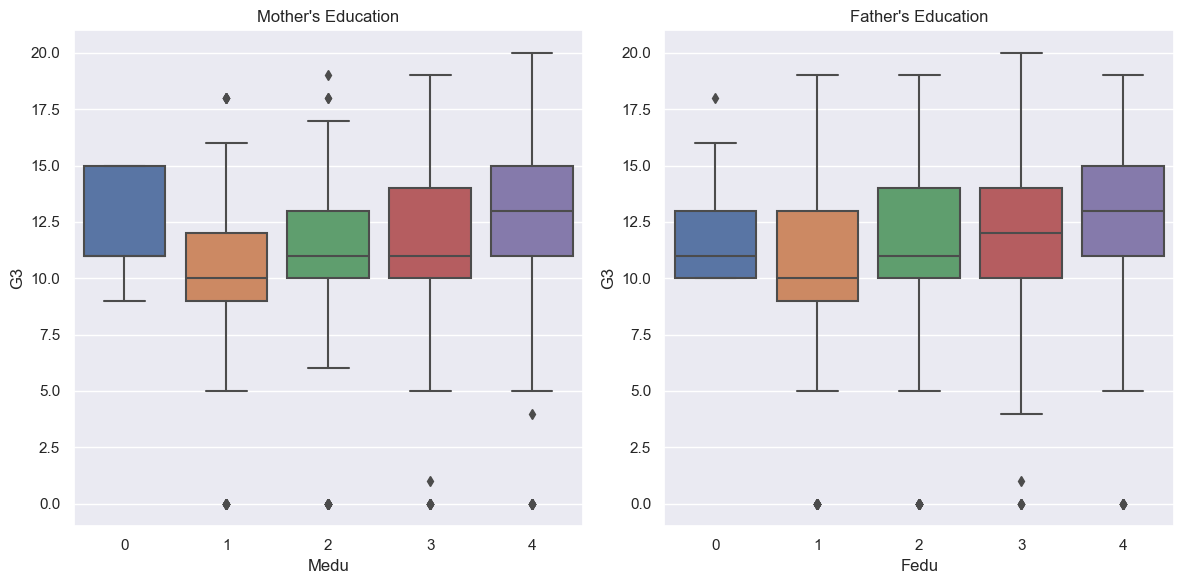

In [183]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='Medu', y='G3', data=students, ax=ax[0])
ax[0].set_title('Mother\'s Education')

sns.boxplot(x='Fedu', y='G3', data=students, ax=ax[1])
ax[1].set_title('Father\'s Education')

plt.tight_layout()
plt.show()


**Insights:**
    
- Students whose mothers have completed higher education tend to score more than others.
- Students whose fathers have completed higher education have a slightly better chance of performing well in exams.



**Contingency Table Analysis:**

- **Father Education**

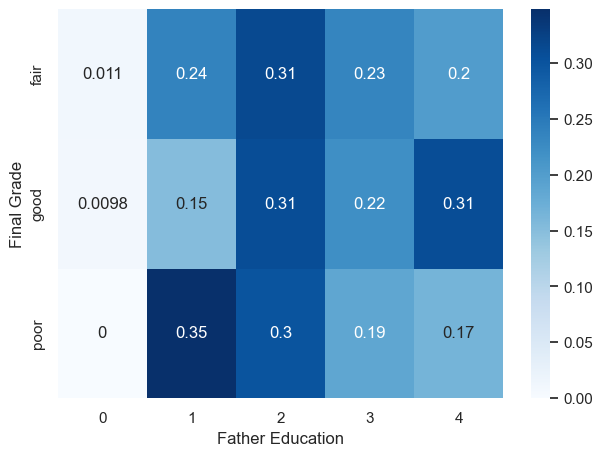

In [206]:
# Create crosstab table
alc_tab1 = pd.crosstab(index=students.final_grade, columns=students.Fedu)

# Calculate row percentages
alc_perc = alc_tab1.apply(lambda x: x / x.sum(), axis=1)

# Visualize the results
sns.heatmap(alc_perc, annot=True, cmap='Blues')
plt.xlabel('Father Education')
plt.ylabel('Final Grade')
plt.show()

- Students with higher Father's education (Fedu=3 and Fedu=4) tend to perform better (higher percentage of "good" grades).
- Students with lower Father's education (Fedu=0 and Fedu=1) tend to perform poorer (higher percentage of "poor" grades).

- **Mother Education**

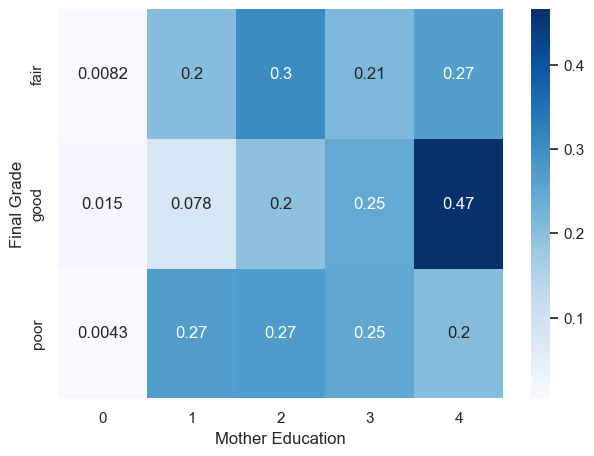

In [207]:
# Create crosstab table
alc_tab1 = pd.crosstab(index=students.final_grade, columns=students.Medu)

# Calculate row percentages
alc_perc = alc_tab1.apply(lambda x: x / x.sum(), axis=1)

# Visualize the results
sns.heatmap(alc_perc, annot=True, cmap='Blues')
plt.xlabel('Mother Education')
plt.ylabel('Final Grade')
plt.show()

**Trends and patterns:**
    
- As mother's education level increases, the proportion of students with "good" grades also increases.
- The proportion of students with "poor" grades decreases as mother's education level increases.
- Students with mothers having higher education (Medu=4) have the highest proportion of "good" grades and the lowest proportion of "poor" grades.

**Hypothesis Testing**

- **For Mother's Education**

In [224]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency table for Mjob and final_grade
contingency_table_mjob = pd.crosstab(students['Medu'], students['final_grade'])

# Perform Chi-Squared Test
chi2_Medu, p_Medu, dof_Medu, expected_Medu = chi2_contingency(contingency_table_mjob)

print(f"Chi-Squared statistic: {chi2_Medu:.4f}")
print(f"P-value: {p_Medu:.4f}")
print(f"Degrees of freedom: {dof_Medu}")

# Interpret the results
if p_Medu < 0.05:
    print("Reject the null hypothesis - there is a significant association between Medu and final_grade.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between Medu and final_grade.")

Chi-Squared statistic: 58.3301
P-value: 0.0000
Degrees of freedom: 8
Reject the null hypothesis - there is a significant association between Medu and final_grade.


- **For Father's Education**

In [223]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency table for Mjob and final_grade
contingency_table_mjob = pd.crosstab(students['Fedu'], students['final_grade'])

# Perform Chi-Squared Test
chi2_Fedu, p_Fedu, dof_Fedu, expected_Fedu = chi2_contingency(contingency_table_mjob)

print(f"Chi-Squared statistic: {chi2_Fedu:.4f}")
print(f"P-value: {p_Fedu:.4f}")
print(f"Degrees of freedom: {dof_Fedu}")

# Interpret the results
if p_Fedu < 0.05:
    print("Reject the null hypothesis - there is a significant association between Fedu and final_grade.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between Fedu and final_grade.")

Chi-Squared statistic: 33.1970
P-value: 0.0001
Degrees of freedom: 8
Reject the null hypothesis - there is a significant association between Fedu and final_grade.


**Recommendation:**

- Encourage and support parents, especially mothers, in pursuing higher education to positively impact their children's academic performance.
- Develop programs targeting families with lower levels of parental education to provide resources and support for students to succeed academically.

# 7 Mother Job and Father Job vs Grade

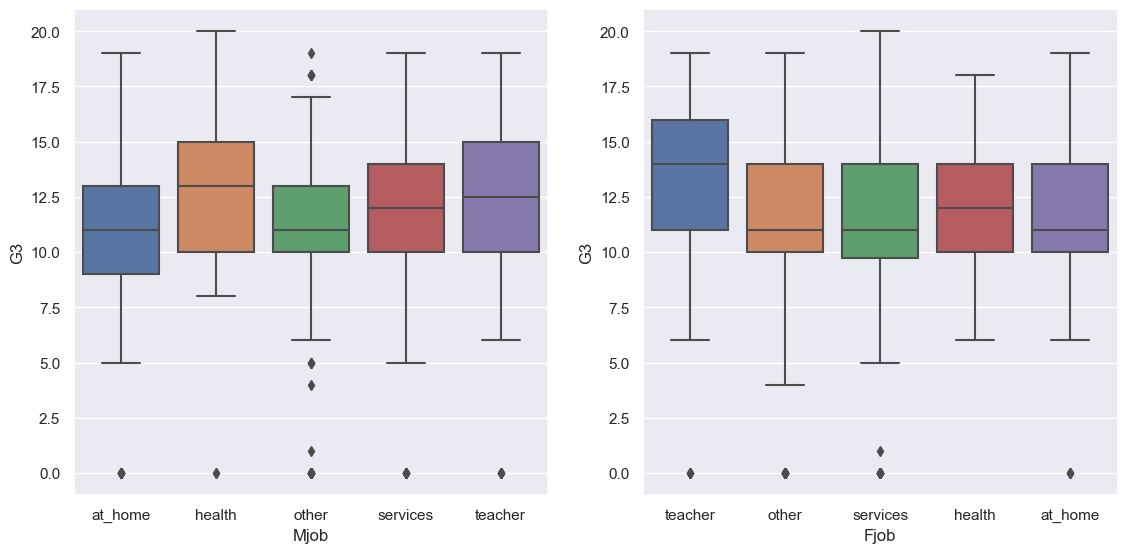

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='Mjob', y='G3', data=students, ax=ax[0])
sns.boxplot(x='Fjob', y='G3', data=students, ax=ax[1])

plt.show()

- **Students whose mothers are teachers or work in healthcare tend to have higher grades (G3).**
- **Students whose fathers are teachers also tend to have higher grades (G3).**

**Hypothesis Test for Categorical Variables**

- **Mother's job and Chi_square test**

In [213]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency table for Mjob and final_grade
contingency_table_mjob = pd.crosstab(students['Mjob'], students['final_grade'])

# Perform Chi-Squared Test
chi2_mjob, p_mjob, dof_mjob, expected_mjob = chi2_contingency(contingency_table_mjob)

print(f"Chi-Squared statistic: {chi2_mjob:.4f}")
print(f"P-value: {p_mjob:.4f}")
print(f"Degrees of freedom: {dof_mjob}")

# Interpret the results
if p_mjob < 0.05:
    print("Reject the null hypothesis - there is a significant association between Mjob and final_grade.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between Mjob and final_grade.")

Chi-Squared statistic: 33.6070
P-value: 0.0000
Degrees of freedom: 8
Reject the null hypothesis - there is a significant association between Mjob and final_grade.


**Father's job and Chi_square test**

In [214]:
 
# Contingency table for Fjob and final_grade
contingency_table_fjob = pd.crosstab(students['Fjob'], students['final_grade'])

# Perform Chi-Squared Test
chi2_fjob, p_fjob, dof_fjob, expected_fjob = chi2_contingency(contingency_table_fjob)

print(f"Chi-Squared statistic: {chi2_fjob:.4f}")
print(f"P-value: {p_fjob:.4f}")
print(f"Degrees of freedom: {dof_fjob}")

# Interpret the results
if p_fjob < 0.05:
    print("Reject the null hypothesis - there is a significant association between Fjob and final_grade.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between Fjob and final_grade.")

Chi-Squared statistic: 21.9132
P-value: 0.0051
Degrees of freedom: 8
Reject the null hypothesis - there is a significant association between Fjob and final_grade.


**Recommendation**

- **For Parents:
Prioritize your child's education and consider careers like teaching or healthcare, which may positively impact their academic performance.**

# 8 reason to choose this school and grade

**reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")**

In [117]:
students['reason'].value_counts()

course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='G3'>

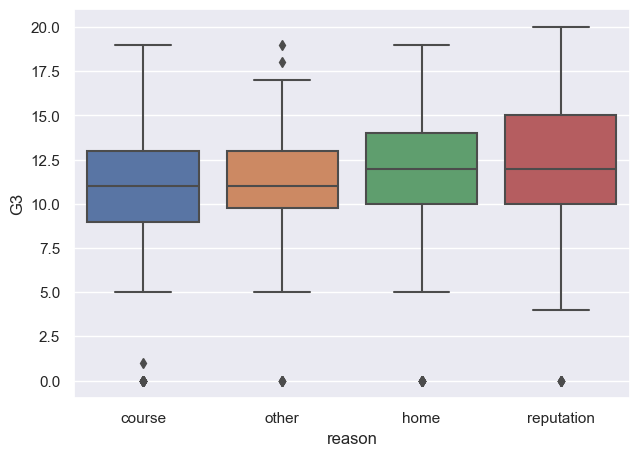

In [218]:
sns.boxplot('reason','G3',data=students)

**Hypothesis Testing**

In [222]:
# Contingency table for reason and final_grade
contingency_table_reason = pd.crosstab(students['reason'], students['final_grade'])

# Perform Chi-Squared Test
chi2_reason, p_reason, dof_reason, expected_reason = chi2_contingency(contingency_table_reason)

print(f"Chi-Squared statistic: {chi2_reason:.4f}")
print(f"P-value: {p_reason:.4f}")
print(f"Degrees of freedom: {dof_reason}")

# Interpret the results
if p_reason < 0.05:
    print("Reject the null hypothesis - there is a significant association between reason to choose school and final_grade.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between reason to choose school  and final_grade.")

Chi-Squared statistic: 17.3508
P-value: 0.0081
Degrees of freedom: 6
Reject the null hypothesis - there is a significant association between reason to choose school and final_grade.


**Insights**
- **Students who prioritize a school's reputation when making their choice tend to perform better academically.**
  
**Recommendation**
- **Therefore, we recommend that students research and consider the reputation of schools when making their decision.**

# 9 Guardian vs Grade

In [120]:
students['guardian'].value_counts()

mother    728
father    243
other      73
Name: guardian, dtype: int64

<AxesSubplot:xlabel='guardian', ylabel='G3'>

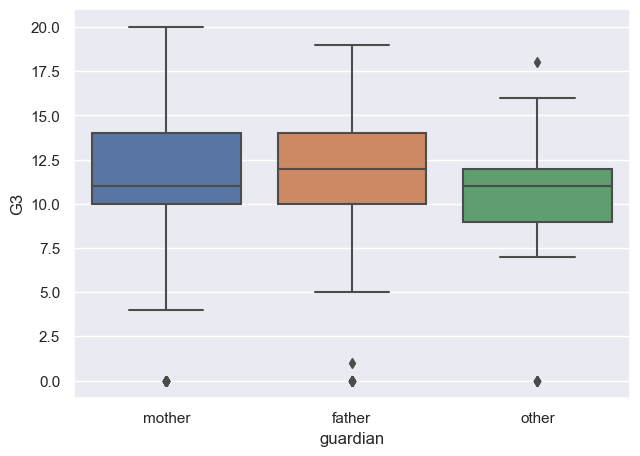

In [121]:
sns.boxplot(x='guardian',y='G3',data=students)

**student with guardian's other than father or mother ,scored less than remaining.**

**Hypothesis Testing**

In [225]:
# Contingency table for guardian and final_grade
contingency_table_guardian = pd.crosstab(students['guardian'], students['final_grade'])

# Perform Chi-Squared Test
chi2_guardian, p_guardian, dof_guardian, expected_guardian = chi2_contingency(contingency_table_guardian)

print(f"Chi-Squared statistic: {chi2_guardian:.4f}")
print(f"P-value: {p_guardian:.4f}")
print(f"Degrees of freedom: {dof_guardian}")

# Interpret the results
if p_guardian < 0.05:
    print("Reject the null hypothesis - there is a significant association between guardian and final_grade.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between guardian and final_grade.")

Chi-Squared statistic: 13.3200
P-value: 0.0098
Degrees of freedom: 4
Reject the null hypothesis - there is a significant association between guardian and final_grade.


**Recommendation:**
- Provide targeted support and resources to students with guardians other than their father or mother to help them overcome unique challenges and achieve academic success. Offer counseling services and facilitate communication between schools and guardians to ensure a supportive environment
    

# 10 Studytime vs Grade

**(numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)**

In [123]:
students['studytime'].value_counts()

2    503
1    317
3    162
4     62
Name: studytime, dtype: int64

In [227]:
students['studytime'].unique()

array([2, 3, 1, 4], dtype=int64)

<AxesSubplot:xlabel='studytime', ylabel='G3'>

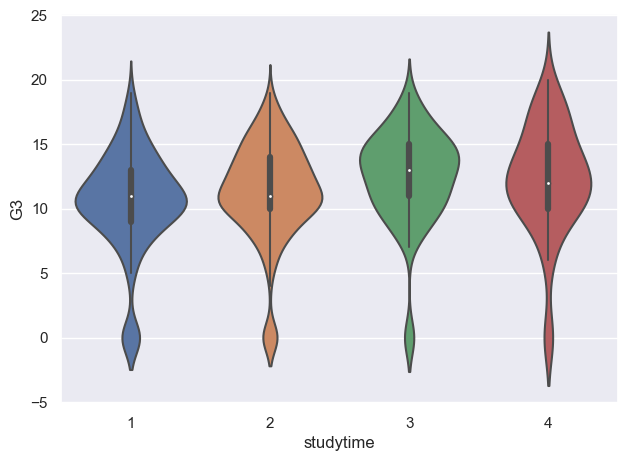

In [228]:
sns.violinplot(x='studytime', y='G3', data=students)

**It's pretty clear that if you study for more time,your result will improve. But we see a little downfall in students who study more than 10 hours , maybe because they are not resting.**



In [226]:
# Contingency table for studytime and final_grade
contingency_table_studytime = pd.crosstab(students['studytime'], students['final_grade'])

# Perform Chi-Squared Test
chi2_studytime, p_studytime, dof_studytime, expected_studytime = chi2_contingency(contingency_table_studytime)

print(f"Chi-Squared statistic: {chi2_studytime:.4f}")
print(f"P-value: {p_studytime:.4f}")
print(f"Degrees of freedom: {dof_studytime}")

# Interpret the results
if p_studytime < 0.05:
    print("Reject the null hypothesis - there is a significant association between studytime and final_grade.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between studytime and final_grade.")

Chi-Squared statistic: 29.9202
P-value: 0.0000
Degrees of freedom: 6
Reject the null hypothesis - there is a significant association between studytime and final_grade.


**Recommendation**
- **Recommendation: Encourage students to study consistently, aiming for 8-10 hours of study time per week. However, also emphasize the importance of rest and breaks to avoid burnout. Suggest that students who study more than 10 hours take regular breaks and prioritize self-care to maintain their physical and mental well-being.**

# 11 Failure vs Grade
**number of past class failures (numeric: n if 1<=n<3, else 4)**

In [229]:
students['failures'].value_counts()

0    861
1    120
2     33
3     30
Name: failures, dtype: int64

<AxesSubplot:xlabel='failures', ylabel='G3'>

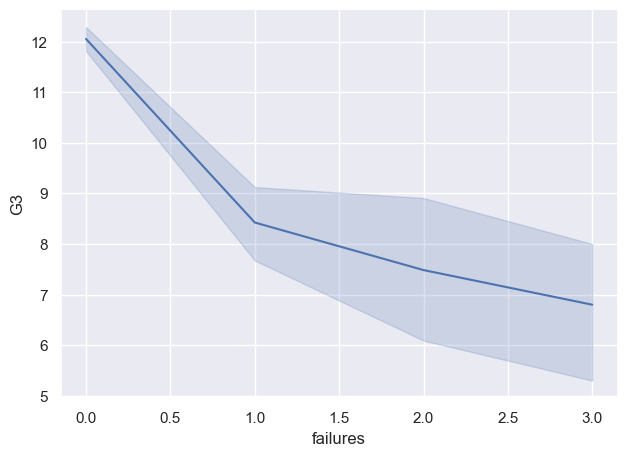

In [238]:
sns.lineplot(x='failures', y='G3', data=students, palette='Set2') 

<AxesSubplot:xlabel='failures', ylabel='G3'>

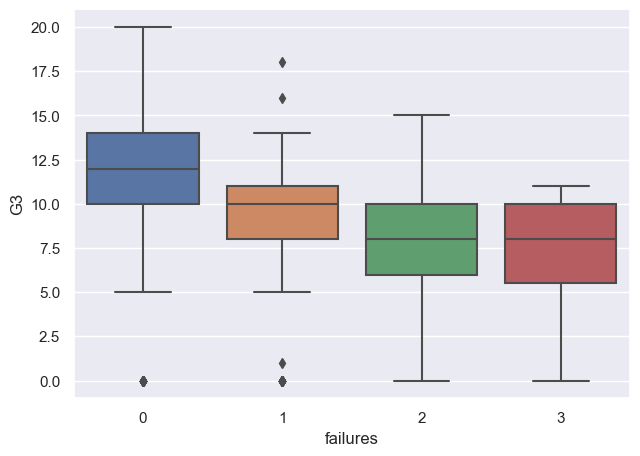

In [233]:
sns.boxplot(x='failures',y='G3',data=students)

**Student's who do not have any past failures record score more.**

In [234]:
# Contingency table for failures and final_grade
contingency_table_failures = pd.crosstab(students['failures'], students['final_grade'])

# Perform Chi-Squared Test
chi2_failures, p_failures, dof_failures, expected_failures = chi2_contingency(contingency_table_failures)

print(f"Chi-Squared statistic: {chi2_failures:.4f}")
print(f"P-value: {p_failures:.4f}")
print(f"Degrees of freedom: {dof_failures}")

# Interpret the results
if p_failures < 0.05:
    print("Reject the null hypothesis - there is a significant association between failures and final_grade.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between failures and final_grade.")

Chi-Squared statistic: 165.5753
P-value: 0.0000
Degrees of freedom: 6
Reject the null hypothesis - there is a significant association between failures and final_grade.


**Recommendation**
- **Recommendation: Encourage students to learn from their mistakes and focus on improvement. Provide additional support and resources to students with past failures to help them catch up. Foster a growth mindset in students, emphasizing that past failures do not define their future academic success.**

# 13 Internet

**Internet access at home (binary: yes or no) ({'no':0, "yes":1})**

<AxesSubplot:xlabel='internet', ylabel='G3'>

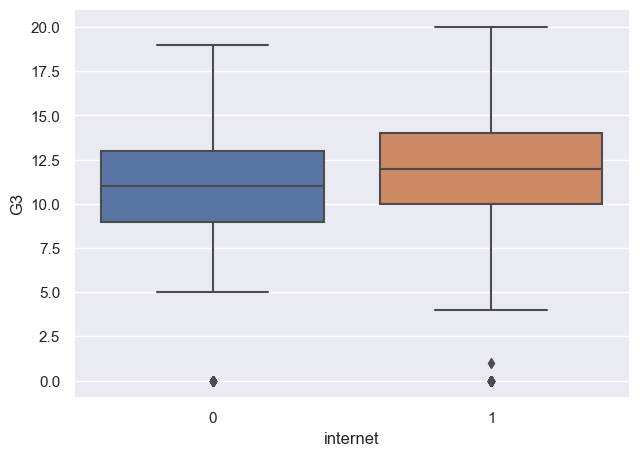

In [135]:
sns.boxplot(x='internet',y='G3',data=students)

<AxesSubplot:xlabel='internet', ylabel='G3'>

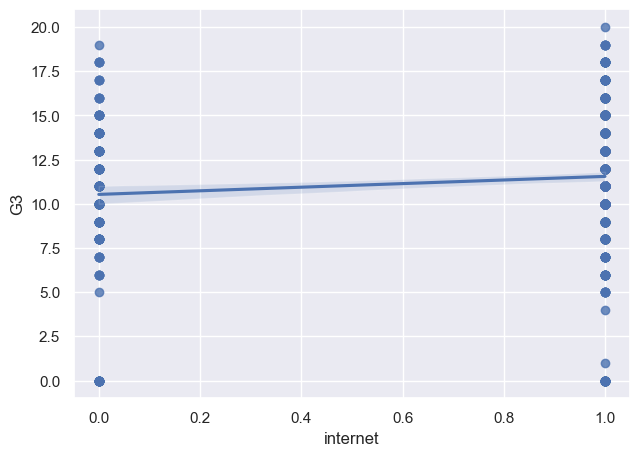

In [164]:
sns.regplot(x='internet', y='G3', data=students )


**Hypothesis Testing**

In [166]:
alc_tab1 = pd.crosstab(index=students.final_grade, columns=students.internet)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)


In [167]:
# chi-square test result -- significant!

alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

0.0011727600491152623

**Since the p-value is less than 0.05, we reject the null hypothesis. This suggests that there is a statistically significant relationship  between Internet and final_grade**

**Insight:**
    
- Most of people who passed the exam had the accessibility to internet

**Recommendation:**

- Provide internet access to students who lack it, to help level the playing field and improve their chances of passing the exam. Consider partnering with organizations that offer free or low-cost internet services for students.

# 14 romantic status and final_grade

In [454]:

perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=students.final_grade, columns=students.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 640x480 with 0 Axes>

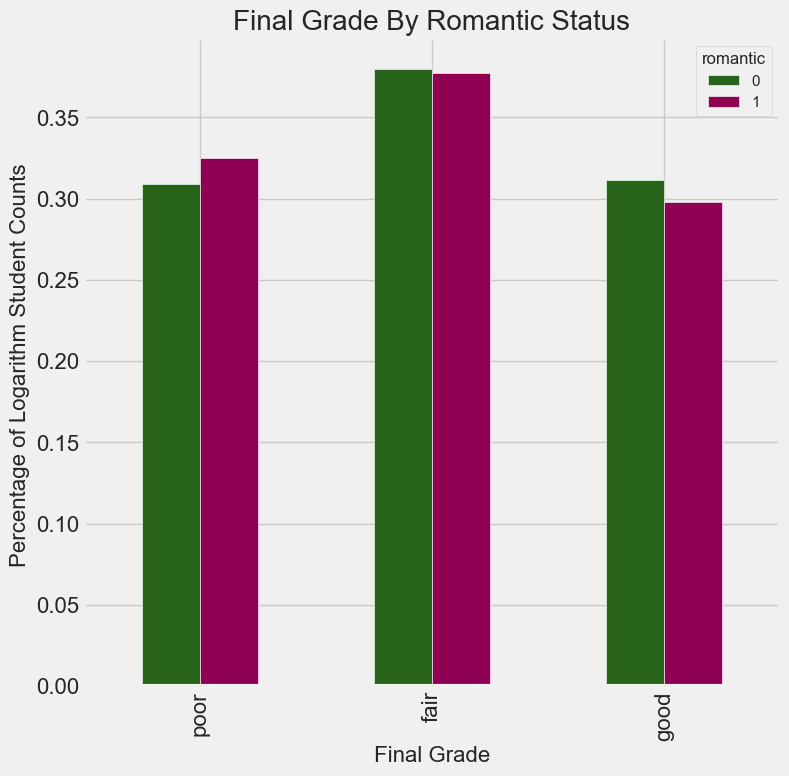

In [455]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

**It shows having romantic relationship can negatively impact the final_grade**

**Hyphothesis Testing confirmed, romantic status has a significant correlation with final grade.**

In [456]:
# chi-square test result -- significant!
import statsmodels.api as sm
romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

0.038810128743959726

**Null Hypothesis says romatic relationship has no impact on final_grade (p>0.05), but here p value is less than 0.05 so we can reject null hypothesis and we can say that romatic impact has impact on final_grade**

**Recommendation**
- **Foster a supportive academic environment that acknowledges the potential distractions of romantic relationships, offering guidance on maintaining focus and prioritizing studies to minimize the negative impact on final grades.**
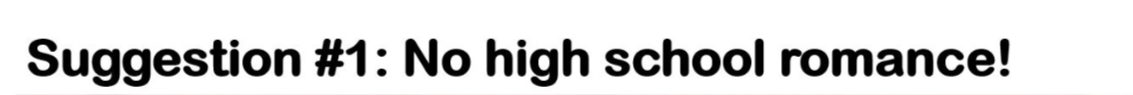

# 15 Final Grade By Alcohol Consumption

**Walc : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)**

In [458]:

alc_tab1 = pd.crosstab(index=students.final_grade, columns=students.Walc)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

In [459]:
# create good student dataframe
good = students.loc[students.final_grade == 'good']
good['good_alcohol_usage']=good.Walc
# create poor student dataframe
poor = students.loc[students.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.Walc



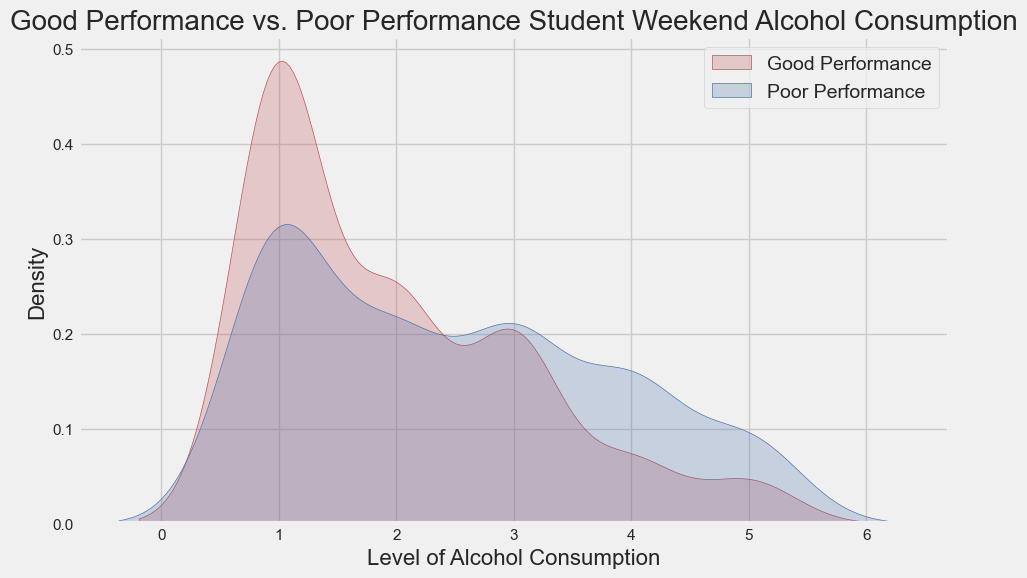

In [460]:
plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r", label='Good Performance')
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b", label='Poor Performance')
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)
plt.legend(loc='upper right', fontsize=14)

**it shows good performance has low alcohol consumption on weekends**

Text(0.5, 0, 'Final Grade')

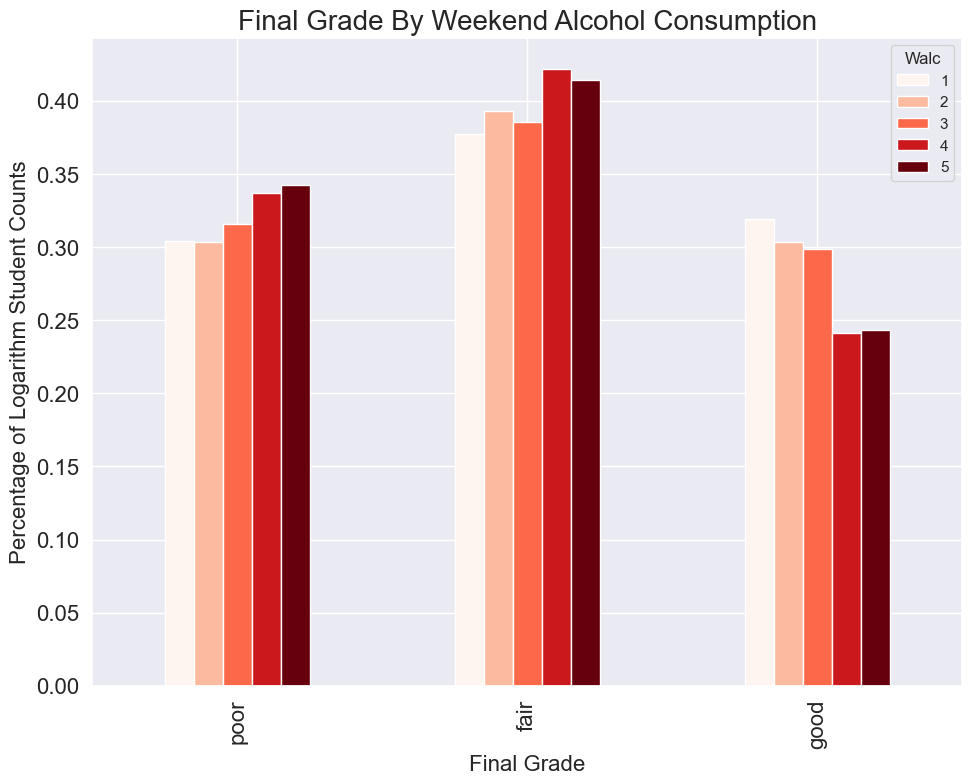

In [57]:
alc_perc.plot.bar(colormap="Reds", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

**Above figure shows students with high alcohol consumption has small number of good grade**

**Hyphothesis Testing confirmed, weekend alcohol consumption has a significant correlation with final grade**

In [58]:
# chi-square test result -- significant!
import statsmodels.api as sm
alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

0.007592294056368298

**p value shows null hypothesis is false and we can say weekend alcohol consumption negatively impacts final_grade**


**Recommendation**
- **
Promote a culture of responsible habits and wellness among students, encouraging moderation and healthy choices, such as alternative social activities and stress-reduction techniques, to support academic success and low alcohol consumption.**

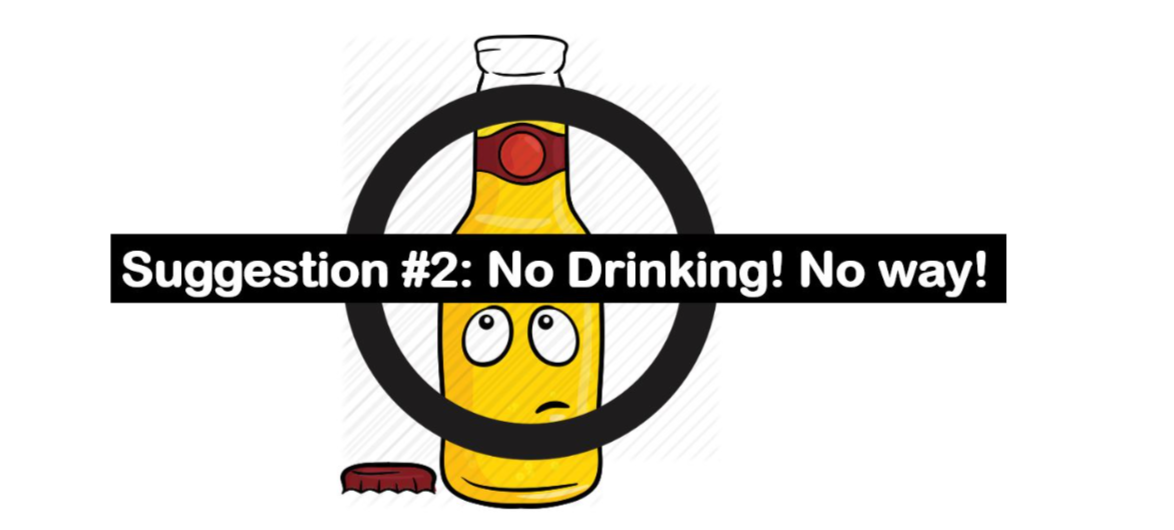

# -------------  No relation variables Below ---------------

# 16 extra-curricular activities
**extra-curricular activities (binary: yes or no) ({'no':0, "yes":1})** 



In [243]:
students['activities'].value_counts()


0    528
1    516
Name: activities, dtype: int64

<AxesSubplot:xlabel='activities', ylabel='G3'>

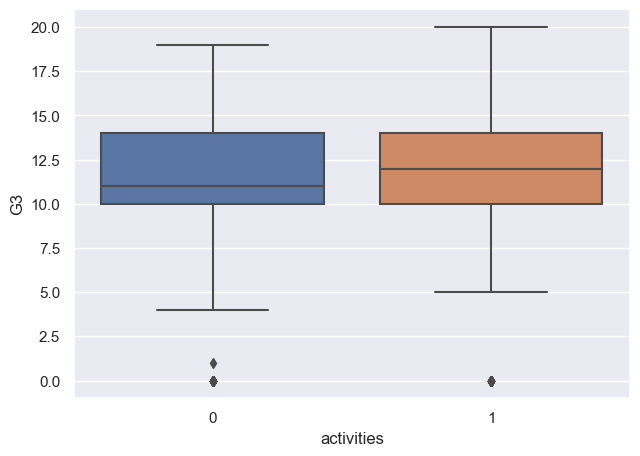

In [244]:
sns.boxplot('activities','G3',data=students)



In [245]:
# Contingency table for activities and final_grade
contingency_table_activities = pd.crosstab(students['activities'], students['final_grade'])

# Perform Chi-Squared Test
chi2_activities, p_activities, dof_activities, expected_activities = chi2_contingency(contingency_table_activities)

print(f"Chi-Squared statistic: {chi2_activities:.4f}")
print(f"P-value: {p_activities:.4f}")
print(f"Degrees of freedom: {dof_activities}")

# Interpret the results
if p_activities < 0.05:
    print("Reject the null hypothesis - there is a significant association between activities and final_grade.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between activities and final_grade.")

Chi-Squared statistic: 1.0871
P-value: 0.5807
Degrees of freedom: 2
Fail to reject the null hypothesis - there is no significant association between activities and final_grade.


# 17 Health and Score
**current health status (numeric: from 1 - very bad to 5 - very good)**



In [256]:
students['health'].value_counts()



5    395
3    215
4    174
1    137
2    123
Name: health, dtype: int64

<AxesSubplot:xlabel='health', ylabel='G3'>

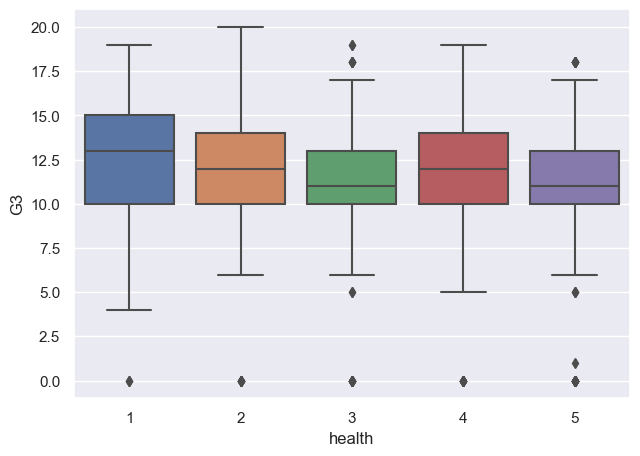

In [257]:
sns.boxplot('health','G3',data=students)



**There's not much difference in the scores with respect to student's health**


In [258]:

from scipy.stats import spearmanr

spearman_corr, p_value = spearmanr(students['health'], students['final_grade'])

print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis - there is a significant correlation between health and final_grade.")
else:
    print("Fail to reject the null hypothesis - there is no significant correlation between health and final_grade.")

Spearman correlation coefficient: -0.0145
P-value: 0.6395
Fail to reject the null hypothesis - there is no significant correlation between health and final_grade.


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


# 18 Absence
**number of school absences (numeric: from 0 to 93)**



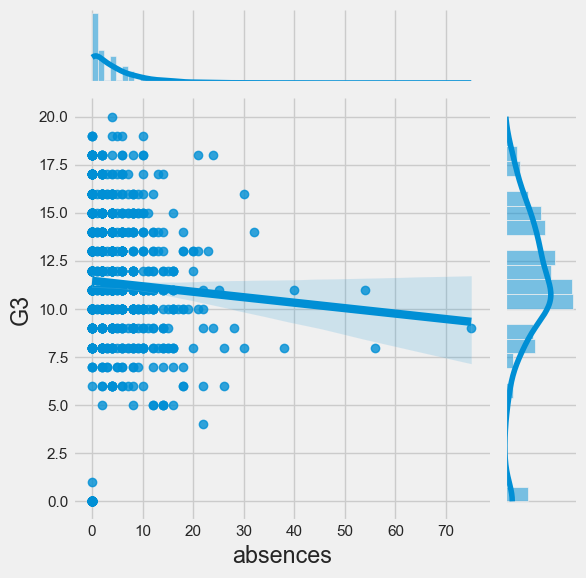

In [466]:
sns.jointplot(x='absences',y='G3',data=students,kind="reg")



**There's not much difference in the scores with respect to student's absence**

**Capturing any linear relationship and finding p value**

In [467]:
import statsmodels.api as sm
import pandas as pd

# Load your dataset into a pandas DataFrame
#students = pd.read_csv('your_data.csv')

# Define the variables
X = students['absences']
y = students['G3']

# Add a constant to the independent value
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Extract the p-value
p_value = model.pvalues[1]

# Print the p-value
print('p-value:', p_value)

# Determine the outcome
if p_value < 0.05:
    print('Reject H0: There is a statistically significant negative relationship between absences and final grade (G3).')
else:
    print('Fail to reject H0: There is no statistically significant relationship between absences and final grade (G3).')

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.178
Date:                Thu, 01 Aug 2024   Prob (F-statistic):              0.140
Time:                        19:36:38   Log-Likelihood:                -2891.2
No. Observations:                1044   AIC:                             5786.
Df Residuals:                    1042   BIC:                             5796.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4680      0.147     78.054      0.0

**Capturing any non_linear relationship and finding p value**

In [468]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd

# Load data
#students = pd.read_csv('your_data.csv')

# Define variables
X = students['absences']
y = students['G3']

# Create a polynomial feature transformer
poly_transformer = PolynomialFeatures(degree=2)

# Transform the data
X_poly = poly_transformer.fit_transform(X.values.reshape(-1, 1))

# Add a constant to the independent value
X_poly = sm.add_constant(X_poly)

# Fit a linear regression model to the transformed data
model = sm.OLS(y, X_poly).fit()

# Print summary
print(model.summary())

# Extract p-value
p_value = model.pvalues[1]

# Print p-value
print('p-value:', p_value)

# Determine outcome
if p_value < 0.05:
    print('Reject H0: There is a statistically significant non-linear relationship between absences and final grade (G3).')
else:
    print('Fail to reject H0: There is no statistically significant non-linear relationship between absences and final grade (G3).')

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.399
Date:                Thu, 01 Aug 2024   Prob (F-statistic):              0.247
Time:                        19:40:09   Log-Likelihood:                -2890.9
No. Observations:                1044   AIC:                             5788.
Df Residuals:                    1041   BIC:                             5803.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4141      0.162     70.413      0.0

**Correlation does not imply causation: The figure might show a correlation, but the p-value indicates that this correlation is not statistically significant.**